# FIT 5196 Assignment 2
#### student name: Napoj Thanomkul
#### student id: 32338589


Date: 12/09/2021

Environment: python version 3.8.10 and anaconda 4.10.3

Package Usage: 
- pandas version 1.3.2 for dataframe manipulation. data cleaning
- numpy version 1.21.2 for solving linear equation system and switch the dataframe row which got numeric value
- matplotlib version 3.4.3 for visualisation EDA (boxplot)
- networkx version 2.6.3 for creating graph and assign edges between graph using in shortest distance calculation algorithm
- nltk.sentiment.vader version 3.4.5 Use for getting compund score of review_list for rating calculation
- Sklearn version 0.24.2 including linear_regression and train_test_split for fitting the model,predict certain value and/or detect outlier.

## 1. Introduction
This assignment will cover on the data cleaning on the three different melbourne-based food delivery platform datasets. These three datasets consist of the three main issues for data cleaning as the following: 
1. The dirty.csv dataset which contain an anomalies in each rows. The anomalies can be either syntatic anomalies (wrong spelling or different in content format) or semantic anomalies (the spelling is correct, but the data is mismatch with the information of other columns). 
2. The missing.csv dataset which contain missing values
3. The outlier.csv dataset which contain an outlier on the particular column (delivery charge)

In order to fix the error within each dataset, these are the following processes required for completing the task:
1. Explore the dataset for identifying error within the dataset.This part will be divided into three sections for each of datasets:
  
       section 3. for dirty-dataset
       section 4. for missing-dataset
       section 5. for outlier-dataset
       
2. Handling the error within each column based on the type of error for each section below*:
  
       section 3. Cleaning the data within each column based on the error type founded
       section 4. Impute the missing value within the dataset
       section 5. Identify an outlier and remove the row which consist of the outlier
       
3. Remove all the unnecessary column and make a suitable format before making an output files for these three tasks

*note: In order to achieve these tasks, the supplementary files such as restaurant_data, edges, and node.csv will be used

The following procedure below will be how the assignment will be completed as described above.

## 2. Import all the necessary packages and Import the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import networkx as nx

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gun_Sean\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Import the Dataset 

In [2]:
# Import all the assignment csv.file
dirty_df= pd.read_csv("32338589_dirty.csv")
miss_df = pd.read_csv("32338589_missing.csv")
out_df=pd.read_csv("32338589_outlier.csv")

#Supplementary file
restau_df=pd.read_csv("restaurant_data_student.csv")
node_df=pd.read_csv("nodes.csv")
edge_df=pd.read_csv("edges.csv")

## 3 Explore Dirty dataset and Clean the dataset

### 3.1 Explore the dataset

To begin with the `.head(10)` code will be used for exploring the first 10 rows of the dataset, while the `.shape` code is used for identifying the dimension of the dataset below 

In [3]:
#Dimension of file and print first ten rows
print(dirty_df.shape)
dirty_df.head(10)

(500, 18)


,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
0,ORD048114,REST0774,CUST05532,COUR0839,-37.820753,144.966833,2020-09-23,17:12:31,0,0,Car,"[('red wine sangria', 2), ('shotgun chicken', ...",10,90.288,529,1,9.51,2.8026
1,ORD220608,REST1829,CUST04615,COUR2687,-37.812684,144.947336,2020-09-06,19:54:43,1,1,Motorbike,"[('momos', 2), ('noodles', 1)]",0,36.790,829,2,8.05,5.4576
2,ORD089386,REST0978,CUST07113,COUR0945,-37.824264,145.014430,2020-12-10,19:58:40,1,0,Bike,"[('butter naan', 3), ('steak', 3)]",0,105.330,5827,29,9.02,7.0563
3,ORD109847,REST1420,CUST12151,COUR3943,-37.803468,144.962735,2020-01-18,11:32:18,0,1,Car,"[('roast beef', 2), ('chicken biryani', 3), ('...",45,63.960,1472,4,9.26,4.3907
4,ORD042361,REST2023,CUST03643,COUR0952,-37.802989,144.967552,2020-10-03,10:29:00,0,1,Motorbike,"[('appam', 3), ('duck roast', 1), ('vegetable ...",10,68.967,2982,6,8.39,4.4579
5,ORD231140,REST0978,CUST00647,COUR0755,-37.807238,144.942679,2020-03-24,01:42:51,0,0,Bike,"[('mutton biryani', 2), ('chicken tikka', 3)]",0,85.540,3238,15,7.22,4.2293
6,ORD242307,REST2023,CUST02818,COUR4269,-37.815282,145.002933,2020-02-09,03:33:37,0,1,Motorbike,"[('roast chicken', 3), ('duck roast', 1), ('ve...",40,60.744,5715,11,8.39,4.7909
7,ORD181549,REST1420,CUST02784,COUR2076,-37.800119,144.967729,2020-06-06,15:25:42,0,1,Bike,"[('chicken biryani', 2), ('beef fry', 1)]",40,46.550,2133,11,9.26,5.1840
8,ORD132348,REST1829,CUST10937,COUR4885,-37.806307,144.964408,2020-07-26,20:38:14,0,1,Car,"[('momos', 2), ('noodles', 3), ('sweet corn so...",0,107.850,3787,9,8.05,4.7194
9,ORD329821,REST2023,CUST13524,COUR4786,-37.814887,144.964738,2020-10-02,00:47:28,0,0,Bike,"[('vegetable stew', 2), ('roast chicken', 1), ...",45,49.352,1926,10,6.71,3.5563


After executed the following code, it seems that we cannot identify any error yet and we identify that this dataset got 500 rows with 18 columns.
Then, we will used `.info()` and `.describe()` on the dataset identifying whether there is a null within a dataset or any incorrect datatype for each column,and identifying some sample statistics within numerical variable on the column, respectively.   

In [4]:
#Check on the null inside the dataset and find some sample statistic value
dirty_df.info()
dirty_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

,customer_lat,customer_lon,is_peak_time,is_weekend,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-35.619900,142.771361,0.188000,0.298000,13.940000,79.177332,3191.688000,9.744000,7.905780,4.240854
std,19.922505,19.922540,0.391103,0.457838,17.832903,37.895436,2982.354269,7.872892,1.026442,1.137857
min,-38.110916,-37.824514,0.000000,0.000000,0.000000,11.424000,41.000000,0.000000,6.440000,2.442300
25%,-37.819147,144.948744,0.000000,0.000000,0.000000,49.770000,1975.500000,5.000000,7.220000,3.378825
50%,-37.813133,144.963377,0.000000,0.000000,0.000000,73.335000,2835.000000,8.000000,7.610000,4.072850
75%,-37.806054,144.978908,0.000000,1.000000,40.000000,102.584500,3968.000000,12.000000,9.020000,4.860025
max,145.016388,145.016424,1.000000,1.000000,45.000000,221.660000,43618.000000,105.000000,9.510000,14.251400


Based on the result of the code execution, there is an error found witin the dataset as the following:

The swapped between the customer_lat and customer_lon. This error is found by looking at the min of customer_lon (-37.8) and max of customer_lat (145.01) which is in the incorrect columns.

Next, the `.describe(include=['O']) ` is used for looking at the unique and count of the object data type column 

In [5]:
#Find some cumulative and frequency of object data type in dataset
dirty_df.describe(include=['O'])

,order_id,restaurant_id,customer_id,carrier_id,date,time,carrier_vehicle,shopping_cart
count,500,500,500,500,500,500,500,500
unique,500,5,493,476,278,267,5,489
top,ORD048114,REST1829,CUST07578,COUR0017,2020-08-31,17:12:31,Bike,"[('appam', 2), ('duck roast', 1)]"
freq,1,109,2,2,5,5,177,3


According to the above result, another error within the dataset is found on the carrier vehicle columns. The unique numbers of carrier_vehicle column is five instead of three.

### 3.2 Clean and detect other columns

#### 3.2.1 Identify error within the carrier_vehicle, customer_lat & lon and clean them
In this subsection, the error within carrier_vehicle and customer_lat & lon will be detected and fixed as the following below:

Firstly, the `.unique()` will be used to show all the value in the carrier_vehicle column

In [6]:
#Describe all the unique value of carrier_vehicle column
dirty_df['carrier_vehicle'].unique()

array(['Car', 'Motorbike', 'Bike', 'motorbike', 'car'], dtype=object)

Based on the above result, it seems that the error is the capitalised or spelling of the word. To fix this problem, `.apply(lambda x:x.capitalize())` will be applied on the dirty dataset carrier_vehicle column. After that, the result of unique() will be back to three. 

In [7]:
#Capitalise the value in carrier vehicle column and recheck by using unique
dirty_df.carrier_vehicle = dirty_df.carrier_vehicle.apply(lambda x: x.capitalize())
dirty_df['carrier_vehicle'].unique()

array(['Car', 'Motorbike', 'Bike'], dtype=object)

Then, `dirty_df[(dirty_df.customer_lat > -37) & (dirty_df.customer_lon < 144)]` will be used for identifying all the rows that the value of customer_lat&lon swapped.

In [8]:
#Find all the row which got swapped value between lat & lon
dirty_df[(dirty_df.customer_lat > -37) & (dirty_df.customer_lon < 144)]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
55,ORD015918,REST1420,CUST11349,COUR1629,145.016388,-37.812183,2020-11-21,06:19:46,0,1,Car,"[('fish fry', 1), ('chicken curry', 2), ('beef...",45,20.477,6779,16,7.41,4.8587
179,ORD141167,REST0978,CUST11616,COUR1885,144.954168,-37.819048,2020-01-04,12:23:44,1,1,Car,"[('steak', 2), ('kulfi', 2), ('mutton biryani'...",0,131.880,3141,8,9.02,6.0055
200,ORD210650,REST1420,CUST07505,COUR0600,144.946248,-37.817898,2020-07-30,14:46:09,0,0,Car,"[('beef fry', 1), ('fish fry', 1), ('chicken c...",20,52.040,2149,5,7.41,3.3033
205,ORD022638,REST2023,CUST04383,COUR0527,144.973302,-37.824419,2020-07-29,10:17:08,0,0,Bike,"[('roast chicken', 1), ('duck roast', 2), ('ap...",10,84.852,3232,16,6.71,4.4724
213,ORD082525,REST2023,CUST05130,COUR0223,144.955812,-37.823231,2020-07-16,19:19:07,1,0,Car,"[('roast chicken', 3), ('duck roast', 2)]",0,87.550,1393,3,6.71,4.4028
466,ORD124191,REST0774,CUST06606,COUR3643,144.982718,-37.824514,2020-01-29,17:32:18,0,0,Bike,"[('beer', 1), ('pasta', 1)]",40,14.136,2146,11,9.51,3.6185


We have found that six rows got a swapped value of customer_lon & lat. Now, we will `dirty_df[['customer_lon','customer_lat']].where(dirty_df['customer_lat']>-37, dirty_df[['customer_lat','customer_lon']].values)` to swap these two columns value. The `.where()` (Bharath,2017) is used for swapping the column value where customer_lat is more than -37.

In [9]:
#Recheck after swap value (Bharath,2017)
dirty_df[['customer_lat','customer_lon']] = dirty_df[['customer_lon','customer_lat']].where(dirty_df['customer_lat']>-37,
                                                                                            dirty_df[['customer_lat','customer_lon']].values)
#Convert the value into 7 decimal point
dirty_df[['customer_lat','customer_lon']] = dirty_df[['customer_lat','customer_lon']].apply(lambda x: pd.Series.round(x,7))

#Recheck whether there is an unclean lat & lon
dirty_df[(dirty_df.customer_lat > -37) & (dirty_df.customer_lon < 144)]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges


After we have finish swapping, we can check whether there are any row with this anomalies by execute the same checking code. Regarding above result, it seems that there is no error left after the cleaning. However, before going to next section, the customer_lat& lon columns will be change it precision to 7 decimal points in order to be used for merging with nodes dataset by using `apply(lambda x: pd.Series.round(x,7))` on customer_lat&lon columns

#### 3.2.2 Identify error within the date column and clean the column

According to the 3.1 section, it seems that there no error within the date column in term of the miss-spelling. However, to make sure that, it is an error free column; the `unique()` command will be used again for a check.

In [10]:
#Get all the unque date
dirty_df['date'].unique()

array(['2020-09-23', '2020-09-06', '2020-12-10', '2020-01-18',
       '2020-10-03', '2020-03-24', '2020-02-09', '2020-06-06',
       '2020-07-26', '2020-10-02', '2020-04-06', '2020-09-02',
       '2020-05-25', '2020-10-10', '2020-04-04', '2020-01-02',
       '2020-04-14', '2020-01-19', '2020-May-04', '2020-06-16',
       '2020-06-15', '2020-08-23', '2020-10-15', '2020-02-23',
       '2020-12-28', '2020-09-10', '2020-01-15', '2020-01-06',
       '2020-06-20', '2020-12-02', '2020-08-24', '2020-09-28',
       '2020-12-04', '2020-07-17', '2020-10-06', '2020-05-26',
       '2020-08-01', '2020-04-25', '2020-06-19', '2020-01-23',
       '2020-04-22', '2020-09-05', '2020-11-11', '2020-12-01',
       '2020-09-21', '2020-11-16', '2020-09-13', '2020-05-11',
       '2020-06-02', '2020-07-05', '2020-06-04', '2020-11-21',
       '2020-05-12', '2020-08-13', '2020-11-27', '2020-10-30',
       '2020-10-19', '2020-07-28', '2020-10-01', '2020-04-26',
       '2020-10-23', '2020-05-10', '2020-12-13', '2020

After the unique is applied, it seems that there is an error in date format. The correct format should by "Year-Month-Day" in a numeric form but some of them got the string form of month within the date format or the month and the date position is swapped. Therefore, it is the format issue which need to be fixed for this column.

In [11]:
#Change the date format according to it original form and change the data type of the column to datetime format, then change to the true format (Jezrael,2017)
dirty_df['date'] = pd.to_datetime(dirty_df['date'], format = '%Y-%m-%d' ,errors = 'coerce').fillna(pd.to_datetime
                                                                                                   (dirty_df['date'], format = '%Y-%b-%d' ,errors = 'coerce')).fillna(pd.to_datetime
                                                                                                   (dirty_df['date'], format = '%Y-%d-%m' ,errors = 'coerce')).dt.strftime('%Y-%m-%d')

The fixing method for this error is apply the `pd.to_datetime` to the column for the true format first, while set the `errors= 'coerce'` to make all the mismatch format become null (Jezrael,2017). Then, `.fillna(pd.to_datetime())` code to change the null to datetime according to the error formats. For example, if the error format is the month is in the string form, the format setting will be '%Y-%b-%d' in the `.fillna(pd.to_datetime())`. After changing the data in the date format to datetime format, we will used `.dt.strftime('%Y-%m-%d')` to change all of the format in the date column to ('%Y-%m-%d') format and we used unique to check the result.

In [12]:
#Recheck after clean the data
dirty_df['date'].unique()

array(['2020-09-23', '2020-09-06', '2020-12-10', '2020-01-18',
       '2020-10-03', '2020-03-24', '2020-02-09', '2020-06-06',
       '2020-07-26', '2020-10-02', '2020-04-06', '2020-09-02',
       '2020-05-25', '2020-10-10', '2020-04-04', '2020-01-02',
       '2020-04-14', '2020-01-19', '2020-05-04', '2020-06-16',
       '2020-06-15', '2020-08-23', '2020-10-15', '2020-02-23',
       '2020-12-28', '2020-09-10', '2020-01-15', '2020-01-06',
       '2020-06-20', '2020-12-02', '2020-08-24', '2020-09-28',
       '2020-12-04', '2020-07-17', '2020-10-06', '2020-05-26',
       '2020-08-01', '2020-04-25', '2020-06-19', '2020-01-23',
       '2020-04-22', '2020-09-05', '2020-11-11', '2020-12-01',
       '2020-09-21', '2020-11-16', '2020-09-13', '2020-05-11',
       '2020-06-02', '2020-07-05', '2020-06-04', '2020-11-21',
       '2020-05-12', '2020-08-13', '2020-11-27', '2020-10-30',
       '2020-10-19', '2020-07-28', '2020-10-01', '2020-04-26',
       '2020-10-23', '2020-05-10', '2020-12-13', '2020-

#### 3.2.3 Identify error of is_peak_time column based on the time column

This section will work on the is_peak_column whether it match with the current time correctly. To validate whether is wrong, we need to look whether the is_peak_time equal to 1 during 12:00:00-13.59.59 or 18:00:00-19:59:59. The first step for the validation is change the format of time column to datatime by using `pd.to_datetime(dirty_df['time'],format = '%H:%M:%S')`

In [13]:
#Change the time column data type to datetime 
dirty_df['time'] = pd.to_datetime(dirty_df['time'],format = '%H:%M:%S')

Now to identify the errors, we will looking at whether there is a is_peak_time column equal to zero during  12:00:00-13.59.59 or 18:00:00-19:59:59 and is_peak_time equal to 1 not during 12:00:00-13.59.59 or 18:00:00-19:59:59 by use this code `pd.concat([dirty_df[(dirty_df['time'].dt.hour>=12)&(dirty_df['time'].dt.hour<14)&(dirty_df['is_peak_time']==0)],dirty_df[(dirty_df['time'].dt.hour>=18)&(dirty_df['time'].dt.hour<20)&(dirty_df['is_peak_time']==0)],dirty_df[(dirty_df['time'].dt.hour>=0)&(dirty_df['time'].dt.hour<12)&(dirty_df['is_peak_time']==1)],
dirty_df[(dirty_df['time'].dt.hour>=14)&(dirty_df['time'].dt.hour<18)&(dirty_df['is_peak_time']==1)]])`

In [14]:
#Identify the row which got anomalies in the time column
pd.concat([dirty_df[(dirty_df['time'].dt.hour>=12)&(dirty_df['time'].dt.hour<14)&(dirty_df['is_peak_time']==0)],
           dirty_df[(dirty_df['time'].dt.hour>=18)&(dirty_df['time'].dt.hour<20)&(dirty_df['is_peak_time']==0)],
           dirty_df[(dirty_df['time'].dt.hour>=0)&(dirty_df['time'].dt.hour<12)&(dirty_df['is_peak_time']==1)],
          dirty_df[(dirty_df['time'].dt.hour>=14)&(dirty_df['time'].dt.hour<18)&(dirty_df['is_peak_time']==1)]])

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
266,ORD130220,REST0978,CUST11255,COUR2633,-37.805143,144.957395,2020-04-23,1900-01-01 13:42:51,0,0,Motorbike,"[('mudpie', 1), ('beef chilli', 1)]",20,30.576,1836,4,9.02,4.5433
29,ORD079021,REST0978,CUST13726,COUR3427,-37.821135,144.957727,2020-01-15,1900-01-01 06:07:54,1,0,Motorbike,"[('sweet corn soup', 2), ('kulfi', 2), ('mutto...",0,120.090,3233,6,9.02,3.3926
145,ORD233835,REST0774,CUST00452,COUR0859,-37.812870,144.942999,2020-11-10,1900-01-01 00:39:33,1,0,Bike,"[('sunday brunch', 1), ('new zealand lamb chop...",0,126.790,2476,12,7.61,3.9911
388,ORD187787,REST1829,CUST12692,COUR3786,-37.803403,144.950080,2020-11-08,1900-01-01 06:35:36,1,1,Car,"[('manchurian', 3), ('egg fried rice', 3), ('c...",0,160.800,2710,7,8.05,4.3737
497,ORD070675,REST0774,CUST00709,COUR4122,-37.815469,144.968083,2020-06-28,1900-01-01 06:03:57,1,1,Car,"[('sunday brunch', 2), ('red wine sangria', 2)...",0,101.450,822,2,9.51,3.6776
218,ORD183305,REST1420,CUST12197,COUR4131,-37.801696,144.963575,2020-10-07,1900-01-01 14:46:09,1,0,Motorbike,"[('fish fry', 1), ('beef curry', 1), ('masala ...",0,46.380,1631,3,7.41,2.9978


Based on the result of the `pd.concat`, there are six rows which got the errors. To clean these rows, `.loc[coditions,"column we want to fix"] =` is used for fix the following error and the format of the time will be change to object by using `dt.strftime()`.

In [15]:
#Change the peak period to the right one
dirty_df.loc[(dirty_df['time'].dt.hour>=12)&(dirty_df['time'].dt.hour<14)&(dirty_df['is_peak_time']==0),"is_peak_time"] = 1
dirty_df.loc[(dirty_df['time'].dt.hour>=14)&(dirty_df['time'].dt.hour<18)&(dirty_df['is_peak_time']==1),"is_peak_time"] = 0
dirty_df.loc[(dirty_df['time'].dt.hour>=0)&(dirty_df['time'].dt.hour<12)&(dirty_df['is_peak_time']==1),"is_peak_time"] = 0

In [16]:
#Check the column after it is cleaned
pd.concat([dirty_df[(dirty_df['time'].dt.hour>=12)&(dirty_df['time'].dt.hour<14)&(dirty_df['is_peak_time']==0)],
           dirty_df[(dirty_df['time'].dt.hour>=18)&(dirty_df['time'].dt.hour<20)&(dirty_df['is_peak_time']==0)],
           dirty_df[(dirty_df['time'].dt.hour>=0)&(dirty_df['time'].dt.hour<12)&(dirty_df['is_peak_time']==1)],
          dirty_df[(dirty_df['time'].dt.hour>=14)&(dirty_df['time'].dt.hour<18)&(dirty_df['is_peak_time']==1)]])

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges


In [17]:
#Change the time format to string
dirty_df['time'] = dirty_df['time'].dt.strftime('%H:%M:%S')

#### 3.2.4 Identify the error of is_weekend by date column

In order to identify the error, we will used the same code as section 3.2.2 to change the date column data type and using `pd.crosstab(dirty_df['date'].dt.dayofweek,dirty_df['is_weekend'])`  to look whether there is an error.

In [18]:
#Change date format to datetime and Check for weekend
dirty_df['date'] = pd.to_datetime(dirty_df['date'], format = '%Y-%m-%d' ,errors = 'coerce').fillna(pd.to_datetime
                                                                                                   (dirty_df['date'], format = '%Y-%b-%d' ,errors = 'coerce')).fillna(pd.to_datetime
                                                                                                   (dirty_df['date'], format = '%Y-%d-%m' ,errors = 'coerce'))

pd.crosstab(dirty_df['date'].dt.dayofweek,dirty_df['is_weekend'])

is_weekend,0,1
date,,
0,88,1
1,66,0
2,77,0
3,55,1
4,64,2
5,1,70
6,0,75


The result shown that there is an error in is_weekend column, such as the weekday (3-4) has been identified as weekend(1) and the weekend(5-6) is classified as a weekday(0).

In [19]:
#Identify the anomalies in each rows
pd.concat([dirty_df[(dirty_df['date'].dt.dayofweek!=5)&(dirty_df['date'].dt.dayofweek!=6)&(dirty_df['is_weekend']==1)],
          dirty_df[(dirty_df['date'].dt.dayofweek==5)&(dirty_df['is_weekend']==0)]])

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
64,ORD117116,REST2023,CUST07938,COUR3982,-37.813178,144.973869,2020-10-23,22:48:47,0,1,Car,"[('vegetable stew', 3), ('roast chicken', 1), ...",0,63.770,2842,7,6.71,3.6353
344,ORD059851,REST2023,CUST12188,COUR4358,-37.802853,144.963372,2020-12-18,11:44:10,0,1,Motorbike,"[('vegetable stew', 1), ('roast chicken', 3), ...",20,75.616,2730,5,6.71,3.4754
378,ORD173335,REST2023,CUST02933,COUR1413,-37.801121,144.976238,2020-11-19,20:50:06,0,1,Motorbike,"[('vegetable stew', 2), ('duck roast', 3), ('r...",0,145.690,3707,7,8.39,3.6696
394,ORD238369,REST0774,CUST08342,COUR1036,-37.813186,144.951611,2020-08-17,00:59:20,0,1,Car,"[('beer', 2), ('cocktails', 1), ('pasta', 3)]",0,82.970,1695,4,9.51,2.8913
439,ORD256554,REST2023,CUST00842,COUR1708,-37.815807,144.961526,2020-02-01,08:58:01,0,0,Car,"[('roast chicken', 3), ('appam', 2), ('duck ro...",0,145.440,1617,4,8.39,4.1788


Based on the crosstab and the rows shown above, there are six rows which got an error. For the cleaning part of this subsection, `.loc[coditions,"column we want to fix"] =` will be used again to fix and the `dt.strftime` will be used for changing the date format to the original format.

In [20]:
#fix the anomalies in the dataset and change the format to original format
dirty_df.loc[(dirty_df['date'].dt.dayofweek!=5)&(dirty_df['date'].dt.dayofweek!=6)&(dirty_df['is_weekend']==1),"is_weekend"] = 0
dirty_df.loc[(dirty_df['date'].dt.dayofweek==5)&(dirty_df['is_weekend']==0),"is_weekend"] = 1
print(pd.crosstab(dirty_df['date'].dt.dayofweek,dirty_df['is_weekend']))
dirty_df['date'] = dirty_df['date'].dt.strftime('%Y-%m-%d')

is_weekend   0   1
date              
0           89   0
1           66   0
2           77   0
3           56   0
4           66   0
5            0  71
6            0  75


#### 3.2.5 Checking the error in the shortest_distance_to_customer and replace them

For the following section, we will used the supplementary dataset (restaurant_data, nodes, edges) to match the node of customer place and restaurant and calculate the shortest distance using dijkstra algorithm. To begin with, we will convert the lat and lon column of nodes dataset to 7 decimal with the same code in section 3.2.1 so that it can be merge into the dirty dataset and other dataset which required merging.

In [21]:
#Change lat & lon column in nodes dataset to 7 decimal point
node_df[['lat','lon']] = node_df[['lat','lon']].apply(lambda x: pd.Series.round(x,7))
node_df.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


Next, we need to rename the column of customer_lat&lon in dirty dataset in order to merge the node dataset and dirty_dataset. After merging, the column will be renamed again to it original name and merge the restaurant_data into the dirty dataset to get restaurant nodes. All of the following process use `.rename(columns={"original_column_name":"replace_column_name"},inplace=True)` for rename and `pd.merge(select_column,merge_column,how='how to merge', on= 'based on which column` for merge. Also, we would like to drop unnecessary columns by using `.drop(["column_name"])`.

In [22]:
#rename customer lat/lon join the customer node
dirty_df.rename(columns={"customer_lat":"lat","customer_lon":"lon"},inplace=True)
dirty_df=pd.merge(dirty_df,node_df,how='left',on=['lat','lon'])
dirty_df.rename(columns={"lat":"customer_lat","lon":"customer_lon"},inplace=True) #rename it back to the original name

#Merge the two dataframe to find a node for restaurant
dirty_df=pd.merge(dirty_df,restau_df,how='left',on="restaurant_id").drop(['menu_items','reviews_list','restaurant_name','lat','lon'],axis=1)

In [23]:
#Looking at the first ten line of dirty_dataset
dirty_df.head(10)

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD048114,REST0774,CUST05532,COUR0839,-37.820753,144.966833,2020-09-23,17:12:31,0,0,Car,"[('red wine sangria', 2), ('shotgun chicken', ...",10,90.288,529,1,9.51,2.8026,617564712,4824077319
1,ORD220608,REST1829,CUST04615,COUR2687,-37.812684,144.947336,2020-09-06,19:54:43,1,1,Motorbike,"[('momos', 2), ('noodles', 1)]",0,36.790,829,2,8.05,5.4576,579986297,628171589
2,ORD089386,REST0978,CUST07113,COUR0945,-37.824264,145.014430,2020-12-10,19:58:40,1,0,Bike,"[('butter naan', 3), ('steak', 3)]",0,105.330,5827,29,9.02,7.0563,781082259,331164104
3,ORD109847,REST1420,CUST12151,COUR3943,-37.803468,144.962735,2020-01-18,11:32:18,0,1,Car,"[('roast beef', 2), ('chicken biryani', 3), ('...",45,63.960,1472,4,9.26,4.3907,4400674670,4735909080
4,ORD042361,REST2023,CUST03643,COUR0952,-37.802989,144.967552,2020-10-03,10:29:00,0,1,Motorbike,"[('appam', 3), ('duck roast', 1), ('vegetable ...",10,68.967,2982,6,8.39,4.4579,471341105,636708808
5,ORD231140,REST0978,CUST00647,COUR0755,-37.807238,144.942679,2020-03-24,01:42:51,0,0,Bike,"[('mutton biryani', 2), ('chicken tikka', 3)]",0,85.540,3238,15,7.22,4.2293,127598558,331164104
6,ORD242307,REST2023,CUST02818,COUR4269,-37.815282,145.002933,2020-02-09,03:33:37,0,1,Motorbike,"[('roast chicken', 3), ('duck roast', 1), ('ve...",40,60.744,5715,11,8.39,4.7909,356085015,636708808
7,ORD181549,REST1420,CUST02784,COUR2076,-37.800119,144.967729,2020-06-06,15:25:42,0,1,Bike,"[('chicken biryani', 2), ('beef fry', 1)]",40,46.550,2133,11,9.26,5.1840,343337623,4735909080
8,ORD132348,REST1829,CUST10937,COUR4885,-37.806307,144.964408,2020-07-26,20:38:14,0,1,Car,"[('momos', 2), ('noodles', 3), ('sweet corn so...",0,107.850,3787,9,8.05,4.7194,3208518289,628171589
9,ORD329821,REST2023,CUST13524,COUR4786,-37.814887,144.964738,2020-10-02,00:47:28,0,0,Bike,"[('vegetable stew', 2), ('roast chicken', 1), ...",45,49.352,1926,10,6.71,3.5563,5902824189,636708808


After that, the edge dataset will be used for shortest distance calculation by using column 'u','v', and 'distance(m)' for creating edge within the graph by using` nx.from_pandas_edgelist(edge_df, source='u', target='v', edge_attr='distance(m)',create_using=nx.Graph)` where edge_attr is the distance, source is the starting point('u') and target is destination point('v')  for `single_source_dijkstra(created_graph, source(start_point),target(destination),and weight=distance)` algorithm (Narasimhan,2018). Then used `.edges(data=True)` to make sure the data is correct, and store all posible shortest distance in a list before apply to the dirty_dataset 

In [24]:
#Check the edge dataset dataframe
edge_df.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In [25]:
#Create algorithm for identify shortest path usign networkx (Narasimhan,2018)
G = nx.from_pandas_edgelist(edge_df, source='u', target='v', edge_attr='distance(m)',create_using=nx.Graph)
G.edges(data=True)


#Update shortest distance based on the algorithm for dirty dataset
dirty_distance_list =[]
for row in dirty_df.itertuples():
    so,tar=row[20],row[19]
    distance,path=nx.single_source_dijkstra(G,source=so,target=tar,weight='distance(m)')
    dirty_distance_list.append(distance)

In [26]:
#Check how many shortest_distance_to_customer in dirty_df is not in the distance list    
print(len(dirty_df[~dirty_df['shortest_distance_to_customer'].isin(dirty_distance_list)]))    

0


As regards the result of the `print(len(dirty_df[~dirty_df['shortest_distance_to_customer'].isin(dirty_distance_list)]))`, there is zero column that have difference distance when comparing shortest distance column with the calculated shortest distance list we can assume that this dataset did not occur error in this column. However, to make sure that it is true we will change the shortest distance column based on the shortest distance list.

In [27]:
#Change shortest distance column based on the  shortest distance list
dirty_df['shortest_distance_to_customer']=dirty_distance_list
dirty_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD048114,REST0774,CUST05532,COUR0839,-37.820753,144.966833,2020-09-23,17:12:31,0,0,Car,"[('red wine sangria', 2), ('shotgun chicken', ...",10,90.288,529.0,1,9.51,2.8026,617564712,4824077319
1,ORD220608,REST1829,CUST04615,COUR2687,-37.812684,144.947336,2020-09-06,19:54:43,1,1,Motorbike,"[('momos', 2), ('noodles', 1)]",0,36.790,829.0,2,8.05,5.4576,579986297,628171589
2,ORD089386,REST0978,CUST07113,COUR0945,-37.824264,145.014430,2020-12-10,19:58:40,1,0,Bike,"[('butter naan', 3), ('steak', 3)]",0,105.330,5827.0,29,9.02,7.0563,781082259,331164104
3,ORD109847,REST1420,CUST12151,COUR3943,-37.803468,144.962735,2020-01-18,11:32:18,0,1,Car,"[('roast beef', 2), ('chicken biryani', 3), ('...",45,63.960,1472.0,4,9.26,4.3907,4400674670,4735909080
4,ORD042361,REST2023,CUST03643,COUR0952,-37.802989,144.967552,2020-10-03,10:29:00,0,1,Motorbike,"[('appam', 3), ('duck roast', 1), ('vegetable ...",10,68.967,2982.0,6,8.39,4.4579,471341105,636708808


#### 3.2.6  Identify the semantic error within travelling time 

For the following section, we will check whether there is an error in calculation within the travel_time_minutes column. This can be checked by converting the speed of each vehicle to meter/minute by divided the speed with 60 and mutiply by 1000. Then apply it in the travel_time_minutes by using `.loc[coditions,"column we want to fix"] =` to apply when the certain condition is met. For instance, if the carrier vehicle column value = 'Car', the travel time will be calculated by shortest_distance//Car_speed

In [28]:
dirty_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD048114,REST0774,CUST05532,COUR0839,-37.820753,144.966833,2020-09-23,17:12:31,0,0,Car,"[('red wine sangria', 2), ('shotgun chicken', ...",10,90.288,529.0,1,9.51,2.8026,617564712,4824077319
1,ORD220608,REST1829,CUST04615,COUR2687,-37.812684,144.947336,2020-09-06,19:54:43,1,1,Motorbike,"[('momos', 2), ('noodles', 1)]",0,36.790,829.0,2,8.05,5.4576,579986297,628171589
2,ORD089386,REST0978,CUST07113,COUR0945,-37.824264,145.014430,2020-12-10,19:58:40,1,0,Bike,"[('butter naan', 3), ('steak', 3)]",0,105.330,5827.0,29,9.02,7.0563,781082259,331164104
3,ORD109847,REST1420,CUST12151,COUR3943,-37.803468,144.962735,2020-01-18,11:32:18,0,1,Car,"[('roast beef', 2), ('chicken biryani', 3), ('...",45,63.960,1472.0,4,9.26,4.3907,4400674670,4735909080
4,ORD042361,REST2023,CUST03643,COUR0952,-37.802989,144.967552,2020-10-03,10:29:00,0,1,Motorbike,"[('appam', 3), ('duck roast', 1), ('vegetable ...",10,68.967,2982.0,6,8.39,4.4579,471341105,636708808


In [29]:
#travelling time check
Bike_speed = (12/60)*1000
Motor_speed = (30/60)*1000
Car_speed = (25/60)*1000

#Apply the speed value in travel time calculation
dirty_df.loc[dirty_df["carrier_vehicle"]=="Car","travel_time_minutes"] = dirty_df["shortest_distance_to_customer"]//Car_speed
dirty_df.loc[dirty_df["carrier_vehicle"]=="Bike","travel_time_minutes"] = dirty_df["shortest_distance_to_customer"]//Bike_speed
dirty_df.loc[dirty_df["carrier_vehicle"]=="Motorbike","travel_time_minutes"] = dirty_df["shortest_distance_to_customer"]//Motor_speed

#Check the result
dirty_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD048114,REST0774,CUST05532,COUR0839,-37.820753,144.966833,2020-09-23,17:12:31,0,0,Car,"[('red wine sangria', 2), ('shotgun chicken', ...",10,90.288,529.0,1.0,9.51,2.8026,617564712,4824077319
1,ORD220608,REST1829,CUST04615,COUR2687,-37.812684,144.947336,2020-09-06,19:54:43,1,1,Motorbike,"[('momos', 2), ('noodles', 1)]",0,36.790,829.0,1.0,8.05,5.4576,579986297,628171589
2,ORD089386,REST0978,CUST07113,COUR0945,-37.824264,145.014430,2020-12-10,19:58:40,1,0,Bike,"[('butter naan', 3), ('steak', 3)]",0,105.330,5827.0,29.0,9.02,7.0563,781082259,331164104
3,ORD109847,REST1420,CUST12151,COUR3943,-37.803468,144.962735,2020-01-18,11:32:18,0,1,Car,"[('roast beef', 2), ('chicken biryani', 3), ('...",45,63.960,1472.0,3.0,9.26,4.3907,4400674670,4735909080
4,ORD042361,REST2023,CUST03643,COUR0952,-37.802989,144.967552,2020-10-03,10:29:00,0,1,Motorbike,"[('appam', 3), ('duck roast', 1), ('vegetable ...",10,68.967,2982.0,5.0,8.39,4.4579,471341105,636708808


Based on the result, it seems that there is an error witin the travel time column because the number of travel_time column in row 4 and 5 is changed after apply the `.loc` function.

#### 3.2.7  Identify the error between coupon_discount and order_price

In the following section, it will be focused on the error within the coupon_discount and order_price column. Firstly, another dataset which got correct information (missing or outlier dataset) will be used for finding the correct value for order_price by identifying each product price(from shopping_cart column) and calculate the price before apply the coupon discount. The following process is how the task will be achieved:

In the begining, we are going to make a 'shopping_cart' column and restaurant_data's menu_items column which is a column consisting of list which have wrong data type(object instead of list) into a list by apply `eval` (Hilsdolf,2020) on these two datasets.

In [30]:
#Order price linear equation system
#find the linear equation system on the miss_df
miss_df['shopping_cart']=miss_df['shopping_cart'].apply(eval) #(Hilsdolf,2020)
restau_df['menu_items']=restau_df['menu_items'].apply(eval)

Then, the filtering of restaurant_id of restaurant_data dataset to match our missing-dataset's restaurant_id is done. This process is done before apply the code`.explode('column that contain lists')`(Dolon, 2020) to look at the product that each restaurant offer. After the `.explode()` is used, the `pd.crosstab(product_res['menu_items'],product_res['restaurant_id'])` will be used to identify whether there a same product that more than one restaurants offer.

In [31]:
#Check all the product whether there is an overlapped 
product_res=restau_df[restau_df['restaurant_id'].isin(miss_df['restaurant_id'].unique())]
product_res=product_res.explode('menu_items') #(Dolon,2020)
pd.crosstab(product_res['menu_items'],product_res['restaurant_id'])

restaurant_id,REST0774,REST0978,REST1420,REST1829,REST2023
menu_items,,,,,
appam,0,0,0,0,1
beef chilli,0,1,0,0,0
beef curry,0,0,1,0,0
beef fry,0,0,1,0,0
beer,1,0,0,0,0
butter naan,0,1,0,0,0
chicken biryani,0,0,1,0,0
chicken curry,0,0,1,0,0
chicken tikka,0,1,0,0,0


According to the result of crosstab, the sweet corn soup is offered by REST0978 and REST1829. After finding the all the product, the explode code will be used with our correct information dataset, and the order_price will be round to two decimal points for the accuracy when comparing each order_price. Next, the for loop will be used with `.loc`on shopping_cart column to create a column of the number of product order by each order_id and the product name ordering by each order_id. Then, in the created product column, the product value will concatenate with restaurant_id in order to make it convenient for finding each product price offering by each restaurant.

In [32]:
#Separate the tuple inside the list of shopping cart into different row based on order_id
order_df = miss_df.explode('shopping_cart') #(Dolon,2020)
order_df=order_df.reset_index()
order_df['order_price'] = round(order_df['order_price'],2)

In [33]:
#Loop for creeat a product and unit column for each order_id
for i in range(0,len(order_df)):
    order_df.loc[i,'unit'] = order_df['shopping_cart'][i][1]

for i in range(0,len(order_df)):
    order_df.loc[i,'product'] = order_df['shopping_cart'][i][0]
    
order_df['product'] = order_df['product']+order_df['restaurant_id']

Then, we will calculate the real price of all the order by using the formula: order_price/ ((1-discount)/100) to find the original price before apply the discount. This calculation will be put into a new column called 'real_price'.

In [34]:
#Real price before applying discount
order_df['real_price'] = round(order_df['order_price']/ (1-(order_df['coupon_discount']/100)),2)
order_df

,index,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,...,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,unit,product,real_price
0,0,ORD192636,REST0978,CUST08006,COUR2992,-37.819614,145.009910,2020-08-10,06:19:46,0,...,"(sweet corn soup, 1)",10,68.08,4971.0,12,NaN,4.0293,1.0,sweet corn soupREST0978,75.64
1,0,ORD192636,REST0978,CUST08006,COUR2992,-37.819614,145.009910,2020-08-10,06:19:46,0,...,"(chicken tikka, 3)",10,68.08,4971.0,12,NaN,4.0293,3.0,chicken tikkaREST0978,75.64
2,1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,...,"(cocktails, 2)",0,86.66,2610.0,13,NaN,6.0322,2.0,cocktailsREST0774,86.66
3,1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,...,"(beer, 2)",0,86.66,2610.0,13,NaN,6.0322,2.0,beerREST0774,86.66
4,1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,...,"(new zealand lamb chops, 1)",0,86.66,2610.0,13,NaN,6.0322,1.0,new zealand lamb chopsREST0774,86.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,498,ORD346301,REST0978,CUST07056,COUR2338,-37.800822,144.956810,2020-03-01,02:46:09,0,...,"(steak, 2)",0,63.54,NaN,7,NaN,NaN,2.0,steakREST0978,63.54
1490,498,ORD346301,REST0978,CUST07056,COUR2338,-37.800822,144.956810,2020-03-01,02:46:09,0,...,"(mudpie, 1)",0,63.54,NaN,7,NaN,NaN,1.0,mudpieREST0978,63.54
1491,498,ORD346301,REST0978,CUST07056,COUR2338,-37.800822,144.956810,2020-03-01,02:46:09,0,...,"(butter naan, 1)",0,63.54,NaN,7,NaN,NaN,1.0,butter naanREST0978,63.54
1492,499,ORD333506,REST1829,CUST09420,COUR4432,-37.809415,144.963773,2020-01-17,22:25:03,0,...,"(sweet corn soup, 2)",45,34.20,3400.0,8,NaN,3.8532,2.0,sweet corn soupREST1829,62.18


Next, `pd.pivot_table(order_df,values='unit',index=['order_id','real_price'],columns=['product'], fill_value=0)`  will be used for creating a new dataframe to form an array using for solving linear equation system for find each product price when app'y `.to_numpy` on the created dataframe and the reset index version of this dataframe(Ayhan,2017). After getting the array of product and real_price, `np.linalg.lstsq(total_product,total_price,rcond=None)[0]` will be used to solve each product cost.

In [35]:
#Create pivot table for creating an array
order_product=pd.pivot_table(order_df,values='unit',index=['order_id','real_price'],columns=['product'], fill_value=0)
order_price=order_product.reset_index()
order_price

product,order_id,real_price,appamREST2023,beef chilliREST0978,beef curryREST1420,beef fryREST1420,beerREST0774,butter naanREST0978,chicken biryaniREST1420,chicken curryREST1420,...,pastaREST0774,red wine sangriaREST0774,roast beefREST1420,roast chickenREST2023,shotgun chickenREST0774,steakREST0978,sunday brunchREST0774,sweet corn soupREST0978,sweet corn soupREST1829,vegetable stewREST2023
0,ORD000070,52.24,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,ORD000252,43.98,0,0,2,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,ORD001101,116.16,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ORD001379,68.97,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,ORD002785,121.68,0,0,0,0,2,0,0,0,...,2,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD346915,81.63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,ORD346944,83.85,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
497,ORD347348,85.54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,ORD347772,123.30,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,3,0,0,0


In [36]:
#Create and array from the pivot table (Ayhan,2017)
total_product= order_product.to_numpy()
total_price=order_price['real_price'].to_numpy()

#Array of true price of each product
m=np.linalg.lstsq(total_product,total_price,rcond=None)[0]
m

array([18.49021687, 23.81986483,  8.46970065, 21.90972547,  7.13002   ,
       21.08008415, 12.32001249,  5.23013769, 20.71948547, 11.87985138,
       19.41961671,  7.21983639, 20.22017575, 18.30017997, 19.99951235,
       13.61998482, 19.6103572 , 13.95013786, 14.39990091, 11.69019108,
       14.69990239,  8.88972679, 16.42978881, 18.86039625, 13.51997581,
       24.36969811, 14.99980328, 14.03026113, 16.30008993, 13.47988363,
       17.76006309,  6.96987569])

Once we got all the product price, we are going to make a list of tuple matching each product with their cost and make into a dataframe. Then we will merge this dataframe with order_df we have create for match the price of each product by each order_id.

In [37]:
#Apply this for calaculate the original price of order
order_col=list(order_price.columns)

#Remove two unnecessary column name and make a pair of item with their costs
order_col.remove('order_id')
order_col.remove('real_price')
real_price=list(zip(order_col,m))

#Create dataframe matching the product with their cost
real_df=pd.DataFrame(real_price,columns=['product','product_price'])
real_df['product_price']= round(real_df['product_price'],2)
real_df

,product,product_price
0,appamREST2023,18.49
1,beef chilliREST0978,23.82
2,beef curryREST1420,8.47
3,beef fryREST1420,21.91
4,beerREST0774,7.13
5,butter naanREST0978,21.08
6,chicken biryaniREST1420,12.32
7,chicken curryREST1420,5.23
8,chicken tikkaREST0978,20.72
9,chowmeinREST1829,11.88


In [38]:
#Merge the product price column to all the order dataframe
order_df=pd.merge(order_df,real_df,how='left',on='product')

After the two dataframes are merge, the new column `real_pro_price` will be created based on `product_price` * `unit` columns. Once each product price ordering by each order_id are calculated, each order_id rows which are separated by `.explode` code will be merge together by sum of `real_pro_price`column 
which will be used for comparing with the real_price column (Muhamed,2018).

In [39]:
#Calculate product prices for amount of product ordering by different order_id 
order_df['real_pro_price'] = order_df['product_price'] * order_df['unit']
order_df= order_df.groupby(['order_id','real_price'])['real_pro_price'].sum().reset_index() #(Muhamed,2018)
order_df

,order_id,real_price,real_pro_price
0,ORD000070,52.24,52.24
1,ORD000252,43.98,43.98
2,ORD001101,116.16,116.15
3,ORD001379,68.97,68.97
4,ORD002785,121.68,121.68
...,...,...,...
495,ORD346915,81.63,81.63
496,ORD346944,83.85,83.85
497,ORD347348,85.54,85.54
498,ORD347772,123.30,123.30


As regards the comparison between `real_price` and `real_pro_price`, it seems that the product price we get from solving the linear equation system is correct. After getting the true product price ordering by different order_id, it will be merge with missing dataset and apply a coupon discount value to identify whether the order price is correct or not by using `.loc[]` to create price `after_discount` column based on coupon discount and identify the difference between order by subtract `order_price` column by `after_discount` column. For example,`miss_df.loc[miss_df['coupon_discount']==45,"after_discount"] = round(miss_df['real_pro_price']-(miss_df['real_pro_price']*(45/100)),2)`  is created to subtract the true price with the 45% of price.

In [40]:
#Round the order price to two decimal and merge the two dataframe consist of true order price
miss_df['order_price'] = round(miss_df['order_price'],2)
miss_df=pd.merge(miss_df,order_df,how='left',on='order_id')
miss_df

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,real_price,real_pro_price
0,ORD192636,REST0978,CUST08006,COUR2992,-37.819614,145.009910,2020-08-10,06:19:46,0,0,Car,"[(sweet corn soup, 1), (chicken tikka, 3)]",10,68.08,4971.0,12,NaN,4.0293,75.64,75.64
1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,1,Bike,"[(cocktails, 2), (beer, 2), (new zealand lamb ...",0,86.66,2610.0,13,NaN,6.0322,86.66,86.66
2,ORD227107,REST1420,CUST01854,COUR1894,-37.824904,145.008606,2020-03-29,00:11:52,0,1,Car,"[(chicken biryani, 1), (beef fry, 1), (roast b...",0,74.79,NaN,16,NaN,NaN,74.79,74.79
3,ORD335629,REST1420,CUST10362,COUR4578,-37.824876,144.991662,2020-12-21,16:21:05,0,0,Motorbike,"[(chicken biryani, 3), (beef fry, 2)]",0,80.78,4977.0,10,NaN,3.9166,80.78,80.78
4,ORD046630,REST1829,CUST00975,COUR2439,-37.811356,144.964172,2020-09-19,06:03:57,0,1,Motorbike,"[(sweet corn soup, 2), (egg fried rice, 2), (m...",0,117.48,3511.0,7,NaN,4.5886,117.48,117.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD273574,REST1829,CUST07755,COUR2129,-37.813351,144.965110,2020-03-16,01:42:51,0,0,Motorbike,"[(chowmein, 3), (manchurian, 3)]",45,42.08,3621.0,7,NaN,3.0019,76.51,76.50
496,ORD312662,REST2023,CUST09625,COUR1346,-37.812341,144.973448,2020-05-17,05:24:23,0,1,Motorbike,"[(appam, 2), (vegetable stew, 3), (roast chick...",0,106.63,NaN,6,NaN,NaN,106.63,106.63
497,ORD323722,REST1829,CUST02619,COUR0952,-37.809362,144.960433,2020-12-12,16:09:13,0,1,Motorbike,"[(noodles, 2), (manchurian, 3), (egg fried ric...",0,99.08,3236.0,6,NaN,4.5750,99.08,99.08
498,ORD346301,REST0978,CUST07056,COUR2338,-37.800822,144.956810,2020-03-01,02:46:09,0,1,Bike,"[(steak, 2), (mudpie, 1), (butter naan, 1)]",0,63.54,NaN,7,NaN,NaN,63.54,63.54


In [41]:
#After discount column, the coupon discount will be used to apply on the after discount column
miss_df.loc[miss_df['coupon_discount']==0,"after_discount"] = round(miss_df['real_pro_price']-(miss_df['real_pro_price']*0),2)
miss_df.loc[miss_df['coupon_discount']==10,"after_discount"] = round(miss_df['real_pro_price']-(miss_df['real_pro_price']*(10/100)),2)
miss_df.loc[miss_df['coupon_discount']==20,"after_discount"] = round(miss_df['real_pro_price']-(miss_df['real_pro_price']*(20/100)),2)
miss_df.loc[miss_df['coupon_discount']==40,"after_discount"] = round(miss_df['real_pro_price']-(miss_df['real_pro_price']*(40/100)),2)
miss_df.loc[miss_df['coupon_discount']==45,"after_discount"] = round(miss_df['real_pro_price']-(miss_df['real_pro_price']*(45/100)),2)
miss_df['diff'] = round(miss_df['order_price'] - miss_df['after_discount'])

#Check whether there is differences between order_price and two price after the discount
miss_df[miss_df['diff']!=0].value_counts()

Series([], dtype: int64)

According to the result of above code, it seems that all the process above using for calculate each product price is valid and can be applied in the dirty dataset. Therefore, the same process will be applied to the dirty dataset and `real_df` which consist a true price for each product will be apply in calculating the `real_pro_price` for each order.

In [42]:
#Apply the solution on the dirty_dataset
dirty_df['shopping_cart']=dirty_df['shopping_cart'].apply(eval) #(Hilsdolf,2020)

In [43]:
#Similar to the prior check, the explode will be used for calculating each product price before combining price in each order_id
dirty_df2 = dirty_df.explode('shopping_cart')
dirty_df2=dirty_df2.reset_index()
dirty_df2['order_price'] = round(dirty_df2['order_price'],2)

In [44]:
#For loop for creating unit and product column in dirty dataset
for i in range(0,len(dirty_df2)):
    dirty_df2.loc[i,'unit'] = dirty_df2['shopping_cart'][i][1]

for i in range(0,len(dirty_df2)):
    dirty_df2.loc[i,'product'] = dirty_df2['shopping_cart'][i][0]

#Concatenate product with restaurant id
dirty_df2['product'] = dirty_df2['product']+dirty_df2['restaurant_id']

In [45]:
#Merge the preparation file with product_price dataframe
dirty_df2=pd.merge(dirty_df2,real_df,how='left',on=['product'])

As we already get all the product price, it is not necessay to use the same method to create a column with the prior price before applying the discount anymore; so we can skip that part by calculate the true price from `product_price` column and `unit` column and repeat the same process with `.loc` for percentage discount and find the differences in `order_price` column with the `after_discount` column in dirty-dataset .

In [46]:
#Calculate the true price based on all product price and their unit
dirty_df2['real_pro_price'] = dirty_df2['product_price'] * dirty_df2['unit']
dirty_df2=dirty_df2.groupby(['order_id','order_price','coupon_discount'])['real_pro_price'].sum().reset_index()

#After discount column, the coupon discount will be used to apply on the after discount column
dirty_df2.loc[dirty_df2['coupon_discount']==0,"after_discount"] = round(dirty_df2['real_pro_price']-(dirty_df2['real_pro_price']*0),2)
dirty_df2.loc[dirty_df2['coupon_discount']==10,"after_discount"] = round(dirty_df2['real_pro_price']-(dirty_df2['real_pro_price']*(10/100)),2)
dirty_df2.loc[dirty_df2['coupon_discount']==20,"after_discount"] = round(dirty_df2['real_pro_price']-(dirty_df2['real_pro_price']*(20/100)),2)
dirty_df2.loc[dirty_df2['coupon_discount']==40,"after_discount"] = round(dirty_df2['real_pro_price']-(dirty_df2['real_pro_price']*(40/100)),2)
dirty_df2.loc[dirty_df2['coupon_discount']==45,"after_discount"] = round(dirty_df2['real_pro_price']-(dirty_df2['real_pro_price']*(45/100)),2)
dirty_df2['diff']=round(dirty_df2['order_price'] - dirty_df2['after_discount'])
dirty_df2

,order_id,order_price,coupon_discount,real_pro_price,after_discount,diff
0,ORD000577,56.73,40,94.55,56.73,0.0
1,ORD001005,166.13,10,184.59,166.13,0.0
2,ORD001585,122.40,10,136.00,122.40,0.0
3,ORD003314,119.73,0,119.73,119.73,0.0
4,ORD003663,53.41,10,59.34,53.41,0.0
...,...,...,...,...,...,...
495,ORD345481,120.81,0,120.81,120.81,0.0
496,ORD345558,40.81,10,45.34,40.81,0.0
497,ORD345607,80.46,45,146.29,80.46,0.0
498,ORD347631,52.09,20,65.11,52.09,0.0


In [47]:
#Check how many anomalies in the order_price
print(len(dirty_df2[round(dirty_df2['order_price'] - dirty_df2['after_discount'])!= 0]))
dirty_df2[round(dirty_df2['order_price'] - dirty_df2['after_discount'])!= 0]

13


,order_id,order_price,coupon_discount,real_pro_price,after_discount,diff
11,ORD008261,66.11,45,110.18,60.60,6.0
108,ORD073846,155.92,0,99.39,99.39,57.0
144,ORD097030,34.72,10,182.02,163.82,-129.0
146,ORD097885,156.96,0,91.96,91.96,65.0
180,ORD119789,64.53,10,107.55,96.80,-32.0
205,ORD140455,67.51,10,67.51,60.76,7.0
213,ORD147994,65.88,40,65.88,39.53,26.0
217,ORD153697,67.53,10,87.11,78.40,-11.0
260,ORD181549,46.55,40,46.55,27.93,19.0
284,ORD198326,65.86,0,94.77,94.77,-29.0


Once we get the `diff` column with differences more than 0, it confirm that the there is an error in both `coupon_discount` and `order_price`.
Based on the error found we can classify error into the following:
     1. `Coupon_discount` error because the real_pro_price column after getting discount, they does not match the order_price
     2. The `order_price` with `coupon_discount`equal zero did not show the same result as the `after_discount` column 
     3. The `order_price` with `coupon_discount`not equal to zero did not show the same result as the `after_discount` column.
     
However, it is difficult to identify whether what problem apply to these problem because we did not have enough information on each order_id so the way to fix this is to make the `order_price` equal to `after_discount` if the `diff` column is not zero with `np.where ()` code (Root, 2016).

In [48]:
# order_price equal to real_pro_price clean the coupon_discount (Root,2016)
dirty_df2['order_price']=np.where(dirty_df2['diff']!= 0,dirty_df2['after_discount'],dirty_df2['order_price'])
dirty_df2[round(dirty_df2['order_price'] - dirty_df2['after_discount'])!= 0]

,order_id,order_price,coupon_discount,real_pro_price,after_discount,diff


In [49]:
#Number of error left after cleaning
len(dirty_df2[round(dirty_df2['order_price'] - dirty_df2['after_discount'])!= 0])

0

After the cleaning is done, we will drop the unnecessary columns in the dirty dataset before creating a new output file for dirty dataset. The `drop` command will be apply with `.columns.difference` for select only the wanted columns only (MaxU,2017).

In [50]:
#Drop the unnecessary columns (MaxU,2017)
dirty_df2.drop(dirty_df2.columns.difference(['order_id','order_price','coupon_discount']), 1,inplace=True)
dirty_df2

<ipython-input-50-2c643bdf3531>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dirty_df2.drop(dirty_df2.columns.difference(['order_id','order_price','coupon_discount']), 1,inplace=True)


,order_id,order_price,coupon_discount
0,ORD000577,56.73,40
1,ORD001005,166.13,10
2,ORD001585,122.40,10
3,ORD003314,119.73,0
4,ORD003663,53.41,10
...,...,...,...
495,ORD345481,120.81,0
496,ORD345558,40.81,10
497,ORD345607,80.46,45
498,ORD347631,52.09,20


In [51]:
#Update the original dirty_dataset with the dataset which coupon discount and order_price is cleaned
dirty_df.update(dirty_df2)
dirty_df.head(12)

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD000577,REST0774,CUST05532,COUR0839,-37.820753,144.966833,2020-09-23,17:12:31,0,0,Car,"[(red wine sangria, 2), (shotgun chicken, 2), ...",40,56.73,529.0,1.0,9.51,2.8026,617564712,4824077319
1,ORD001005,REST1829,CUST04615,COUR2687,-37.812684,144.947336,2020-09-06,19:54:43,1,1,Motorbike,"[(momos, 2), (noodles, 1)]",10,166.13,829.0,1.0,8.05,5.4576,579986297,628171589
2,ORD001585,REST0978,CUST07113,COUR0945,-37.824264,145.014430,2020-12-10,19:58:40,1,0,Bike,"[(butter naan, 3), (steak, 3)]",10,122.40,5827.0,29.0,9.02,7.0563,781082259,331164104
3,ORD003314,REST1420,CUST12151,COUR3943,-37.803468,144.962735,2020-01-18,11:32:18,0,1,Car,"[(roast beef, 2), (chicken biryani, 3), (chick...",0,119.73,1472.0,3.0,9.26,4.3907,4400674670,4735909080
4,ORD003663,REST2023,CUST03643,COUR0952,-37.802989,144.967552,2020-10-03,10:29:00,0,1,Motorbike,"[(appam, 3), (duck roast, 1), (vegetable stew,...",10,53.41,2982.0,5.0,8.39,4.4579,471341105,636708808
5,ORD004891,REST0978,CUST00647,COUR0755,-37.807238,144.942679,2020-03-24,01:42:51,0,0,Bike,"[(mutton biryani, 2), (chicken tikka, 3)]",45,71.20,3238.0,16.0,7.22,4.2293,127598558,331164104
6,ORD005673,REST2023,CUST02818,COUR4269,-37.815282,145.002933,2020-02-09,03:33:37,0,1,Motorbike,"[(roast chicken, 3), (duck roast, 1), (vegetab...",0,87.33,5715.0,11.0,8.39,4.7909,356085015,636708808
7,ORD006378,REST1420,CUST02784,COUR2076,-37.800119,144.967729,2020-06-06,15:25:42,0,1,Bike,"[(chicken biryani, 2), (beef fry, 1)]",40,65.86,2133.0,10.0,9.26,5.1840,343337623,4735909080
8,ORD006896,REST1829,CUST10937,COUR4885,-37.806307,144.964408,2020-07-26,20:38:14,0,1,Car,"[(momos, 2), (noodles, 3), (sweet corn soup, 3)]",45,52.45,3787.0,9.0,8.05,4.7194,3208518289,628171589
9,ORD007558,REST2023,CUST13524,COUR4786,-37.814887,144.964738,2020-10-02,00:47:28,0,0,Bike,"[(vegetable stew, 2), (roast chicken, 1), (duc...",0,31.00,1926.0,9.0,6.71,3.5563,5902824189,636708808


In [52]:
#Remove the unnecessary column of missing-dataset before next section
miss_df.drop(['real_price','real_pro_price','after_discount','diff'],axis=1,inplace=True)

## 4. Explore missing-dataset and Impute the value in the missing column

### 4.1 Explore the missing-dataset before imputation

Firstly the same process as the dirty-dataset will be applied here, such using `.head()` and `.info()` for null checking within the missing dataset

In [53]:
# File explore
miss_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges
0,ORD192636,REST0978,CUST08006,COUR2992,-37.819614,145.009910,2020-08-10,06:19:46,0,0,Car,"[(sweet corn soup, 1), (chicken tikka, 3)]",10,68.08,4971.0,12,NaN,4.0293
1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,1,Bike,"[(cocktails, 2), (beer, 2), (new zealand lamb ...",0,86.66,2610.0,13,NaN,6.0322
2,ORD227107,REST1420,CUST01854,COUR1894,-37.824904,145.008606,2020-03-29,00:11:52,0,1,Car,"[(chicken biryani, 1), (beef fry, 1), (roast b...",0,74.79,NaN,16,NaN,NaN
3,ORD335629,REST1420,CUST10362,COUR4578,-37.824876,144.991662,2020-12-21,16:21:05,0,0,Motorbike,"[(chicken biryani, 3), (beef fry, 2)]",0,80.78,4977.0,10,NaN,3.9166
4,ORD046630,REST1829,CUST00975,COUR2439,-37.811356,144.964172,2020-09-19,06:03:57,0,1,Motorbike,"[(sweet corn soup, 2), (egg fried rice, 2), (m...",0,117.48,3511.0,7,NaN,4.5886


In [54]:
#Check the null 
miss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

Based on the result, it seems that there are three columns that got nulls as shown above. The columns which got null values are the `delivery_charges`, 
`restaurant_rating`, and `shortest_distance_to_customer`. This is confirmed by looking at the `.info()` code which show 350 and 0 non-null in the three mentioned columns.

### 4.2 Missing value imputation

In the following section, the missing value in the shortest_distance, restaurant rating and delivery charges columns of the missing_dataset will be imputed by the following process:

#### 4.2.1 Imputation of shortest distance algorithm from earlier dataset to replace the null

The process of imputation of shortest distance will be used the same process to calculate the shortest distance as the dirty-dataset, which is begin by change the customer_lat & lon to 7 decimal point and change the column name to lat & lon in order to merge with nodes dataset and change the name back to customer_lat&lon. Then, the dataset will be merge with the restaurant_data dataset.

In [55]:
#Change the value to 7 decimal point in lat and lon in missing_dataset
miss_df[['customer_lat','customer_lon']] = miss_df[['customer_lat','customer_lon']].apply(lambda x: pd.Series.round(x,7))

In [56]:
#Calculate all the shortest_distance_to customer for missing column
miss_df.rename(columns={"customer_lat":"lat","customer_lon":"lon"},inplace=True)
miss_df=pd.merge(miss_df,node_df,how='left',on=['lat','lon'])
miss_df.rename(columns={"lat":"customer_lat","lon":"customer_lon"},inplace=True) #rename it back to the original name

#Merge the two dataframe to find a node for restaurant
miss_df=pd.merge(miss_df,restau_df,how='left',on="restaurant_id").drop(['menu_items','reviews_list','restaurant_name','lat','lon'],axis=1)

In [57]:
#Explore fews rows of missing_dataframe
miss_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD192636,REST0978,CUST08006,COUR2992,-37.819614,145.009910,2020-08-10,06:19:46,0,0,Car,"[(sweet corn soup, 1), (chicken tikka, 3)]",10,68.08,4971.0,12,NaN,4.0293,1458418093,331164104
1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,1,Bike,"[(cocktails, 2), (beer, 2), (new zealand lamb ...",0,86.66,2610.0,13,NaN,6.0322,1281079287,4824077319
2,ORD227107,REST1420,CUST01854,COUR1894,-37.824904,145.008606,2020-03-29,00:11:52,0,1,Car,"[(chicken biryani, 1), (beef fry, 1), (roast b...",0,74.79,NaN,16,NaN,NaN,260907254,4735909080
3,ORD335629,REST1420,CUST10362,COUR4578,-37.824876,144.991662,2020-12-21,16:21:05,0,0,Motorbike,"[(chicken biryani, 3), (beef fry, 2)]",0,80.78,4977.0,10,NaN,3.9166,2935371904,4735909080
4,ORD046630,REST1829,CUST00975,COUR2439,-37.811356,144.964172,2020-09-19,06:03:57,0,1,Motorbike,"[(sweet corn soup, 2), (egg fried rice, 2), (m...",0,117.48,3511.0,7,NaN,4.5886,176704317,628171589


Again once the merging is done, the shortest distance algorithm we created from the previous dataset section will be used; but the only differences here is that it apply the the new list of destination we have created from this dataset.

In [58]:
#Update shortest distance based on the algorithm for miss_dataset (Narasimhan,2018)
miss_distance_list =[]
for row in miss_df.itertuples():
    so,tar=row[20],row[19]
    distance,path=nx.single_source_dijkstra(G,source=so,target=tar,weight='distance(m)')
    miss_distance_list.append(distance)
    
miss_df['shortest_distance_to_customer']=miss_distance_list

In [59]:
#after apply the algorithm, check for missing value
miss_df['shortest_distance_to_customer'].isnull().value_counts()

False    500
Name: shortest_distance_to_customer, dtype: int64

In [60]:
#Check the dataframe
miss_df

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD192636,REST0978,CUST08006,COUR2992,-37.819614,145.009910,2020-08-10,06:19:46,0,0,Car,"[(sweet corn soup, 1), (chicken tikka, 3)]",10,68.08,4971.0,12,NaN,4.0293,1458418093,331164104
1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,1,Bike,"[(cocktails, 2), (beer, 2), (new zealand lamb ...",0,86.66,2610.0,13,NaN,6.0322,1281079287,4824077319
2,ORD227107,REST1420,CUST01854,COUR1894,-37.824904,145.008606,2020-03-29,00:11:52,0,1,Car,"[(chicken biryani, 1), (beef fry, 1), (roast b...",0,74.79,6640.0,16,NaN,NaN,260907254,4735909080
3,ORD335629,REST1420,CUST10362,COUR4578,-37.824876,144.991662,2020-12-21,16:21:05,0,0,Motorbike,"[(chicken biryani, 3), (beef fry, 2)]",0,80.78,4977.0,10,NaN,3.9166,2935371904,4735909080
4,ORD046630,REST1829,CUST00975,COUR2439,-37.811356,144.964172,2020-09-19,06:03:57,0,1,Motorbike,"[(sweet corn soup, 2), (egg fried rice, 2), (m...",0,117.48,3511.0,7,NaN,4.5886,176704317,628171589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD273574,REST1829,CUST07755,COUR2129,-37.813351,144.965110,2020-03-16,01:42:51,0,0,Motorbike,"[(chowmein, 3), (manchurian, 3)]",45,42.08,3621.0,7,NaN,3.0019,1327054074,628171589
496,ORD312662,REST2023,CUST09625,COUR1346,-37.812341,144.973448,2020-05-17,05:24:23,0,1,Motorbike,"[(appam, 2), (vegetable stew, 3), (roast chick...",0,106.63,2761.0,6,NaN,NaN,2279153639,636708808
497,ORD323722,REST1829,CUST02619,COUR0952,-37.809362,144.960433,2020-12-12,16:09:13,0,1,Motorbike,"[(noodles, 2), (manchurian, 3), (egg fried ric...",0,99.08,3236.0,6,NaN,4.5750,316414092,628171589
498,ORD346301,REST0978,CUST07056,COUR2338,-37.800822,144.956810,2020-03-01,02:46:09,0,1,Bike,"[(steak, 2), (mudpie, 1), (butter naan, 1)]",0,63.54,1366.0,7,NaN,NaN,777905273,331164104


Based on the result of the `miss_df['shortest_distance_to_customer'].isnull().value_counts()` is zero which does not consist of null anymore.

#### 4.2.2 Rating Analyzing

For calculating the rating, the `SentimentIntensityAnalyzer()` will be used for getting the coumpound polarity score in each review on the review_ist of each restaurant in restaurant_data dataset. Before using the analyser, the `review_list` column will be make into a list by using `eval`. Next, the length of each review_list will be created into another column. This column will be used for identify the average polarity score for restaurant rating. Then, the loop is used with the analyzer for calculating polarity compound scores for each review within the review_list (Specter07,2020).

In [61]:
#Create an analyzer and make reviews_list column into a list
analyzer = SentimentIntensityAnalyzer()
restau_df['reviews_list']=restau_df['reviews_list'].apply(eval) #(Hilsdolf,2020)

#Length of the review list
restau_df['review_length'] = restau_df['reviews_list'].str.len()

#Get the compound score of all the restaurant for the dataset (Specter07,2020)
for i in range(0,len(restau_df)):
    restau_df.loc[i,'compound'] = sum([analyzer.polarity_scores(message)['compound'] for message in restau_df.loc[i,'reviews_list']])

#Get average polarity compound score for each restaurant
restau_df['avg_polarity'] = restau_df['compound']/restau_df['review_length']

# Get the rating
restau_df['restaurant_rating'] = round(10*(restau_df['avg_polarity'] + 0.9623)/(1.9533),2)

restau_df.head()

,restaurant_id,restaurant_name,menu_items,reviews_list,lat,lon,rest_nodes,review_length,compound,avg_polarity,restaurant_rating
0,REST0000,jalsa,"[biryani, butter chicken, dal makhani, dum bir...",[* great place for families* mughal theme food...,-37.821295,144.987506,1445473970,25,16.8525,0.674100,8.38
1,REST0001,spice elephant,"[chicken biryani, chocolate nirvana, dum birya...",[a decent place for a family lunch or dinner.....,-37.805811,144.938170,3555788741,14,8.0868,0.577629,7.88
2,REST0002,san churro cafe,"[cannelloni, churros, hot chocolate, minestron...",[rated went there for a quick bite with friend...,-37.815720,144.950524,579489323,24,11.0733,0.461388,7.29
3,REST0003,timepass dinner,"[jeera rice, kadhai paneer, onion rings, pasta...",[came over here with family unexpectedly on va...,-37.812461,144.953430,5002595078,2,1.2082,0.604100,8.02
4,REST0004,onesta,"[apple pie, bacon pizza, banana smoothie, barb...",[rated best place for pizzas. we had bacon wra...,-37.821704,145.009534,331417007,25,21.2181,0.848724,9.27


After getting the `compund score`, it will be used with `review_length` to calculate the average polarity with formula 'compound/review_length'. Then, the average score will be used for calculate the rating with the following formula: 10 * (average_score +0.9623)/ 1.9533. This method will be consider accurate if REST0000 got rating of 8.38. Based on the result, the REST0000 got rating 8.38 so we can considered this method is valid.

The next step is merging the restaurant_rating column to missing dataset by filtering the restaurant_data to match the restaurant_id of missing-dataset.

In [62]:
#Analyse the compund polarity score for each restaurant
miss_rest_code=miss_df['restaurant_id'].unique()
miss_res=restau_df[restau_df["restaurant_id"].isin(miss_rest_code)]
miss_res

,restaurant_id,restaurant_name,menu_items,reviews_list,lat,lon,rest_nodes,review_length,compound,avg_polarity,restaurant_rating
774,REST0774,bg's poolside bar & grill,"[beer, cocktails, new zealand lamb chops, past...",[another day made memorable by the restaurant ...,-37.819565,144.963580,4824077319,10,8.9463,0.894630,9.51
978,REST0978,shezan,"[beef chilli, butter naan, chicken tikka, kulf...",[been here with family (2 people). ordered 1 s...,-37.800250,144.970084,331164104,8,6.4009,0.800113,9.02
1420,REST1420,jose's mess,"[beef curry, beef fry, chicken biryani, chicke...","[always a fan of this place. josettan's mess, ...",-37.804260,144.949560,4735909080,4,3.3839,0.845975,9.26
1829,REST1829,one chu restaurant,"[chowmein, egg fried rice, manchurian, momos, ...",[i had ordered chicken lollipop and chicken co...,-37.811212,144.947747,628171589,9,5.4838,0.609311,8.05
2023,REST2023,leela's kitchen,"[appam, duck roast, roast chicken, vegetable s...",[rated the meals was just ok. fish curry had n...,-37.817342,144.946281,636708808,25,16.9071,0.676284,8.39


In [63]:
#Merge restaurant_data which used for the missing-dataset with the missing-dataset
miss_df=miss_df.merge(miss_res[['restaurant_id','restaurant_rating']],on = 'restaurant_id', how='left')
miss_df.restaurant_rating_x = miss_df.restaurant_rating_y

In [64]:
#Drop the replicate colomn
miss_df=miss_df.drop(['restaurant_rating_y'],axis=1)
miss_df.rename(columns={"restaurant_rating_x":"restaurant_rating"},inplace=True)
miss_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD192636,REST0978,CUST08006,COUR2992,-37.819614,145.009910,2020-08-10,06:19:46,0,0,Car,"[(sweet corn soup, 1), (chicken tikka, 3)]",10,68.08,4971.0,12,9.02,4.0293,1458418093,331164104
1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,1,Bike,"[(cocktails, 2), (beer, 2), (new zealand lamb ...",0,86.66,2610.0,13,9.51,6.0322,1281079287,4824077319
2,ORD227107,REST1420,CUST01854,COUR1894,-37.824904,145.008606,2020-03-29,00:11:52,0,1,Car,"[(chicken biryani, 1), (beef fry, 1), (roast b...",0,74.79,6640.0,16,9.26,NaN,260907254,4735909080
3,ORD335629,REST1420,CUST10362,COUR4578,-37.824876,144.991662,2020-12-21,16:21:05,0,0,Motorbike,"[(chicken biryani, 3), (beef fry, 2)]",0,80.78,4977.0,10,9.26,3.9166,2935371904,4735909080
4,ORD046630,REST1829,CUST00975,COUR2439,-37.811356,144.964172,2020-09-19,06:03:57,0,1,Motorbike,"[(sweet corn soup, 2), (egg fried rice, 2), (m...",0,117.48,3511.0,7,8.05,4.5886,176704317,628171589


Once the merge is done we will get all the ratings and impute them into the rating column in the missing-dataset.

#### 4.2.3 Using Linear Regression to impute the missing data in the dataset.

Firstly, the new dataframe will be created using the missing-dataset which already drop the null rows to create a `miss_df_dropna` dataframe. This will be used for imputation after it is used within the linear regression model.

In [65]:
# Drop null in the dataset and assign it as a new dataframe for imputation and check whether there is null
miss_df_dropna = miss_df.dropna(subset=['delivery_charges'])
miss_df_dropna['delivery_charges'].isnull().sum()

0

In [66]:
#Compare the original dataframe with the dropna dataframe
miss_df['delivery_charges'].isnull().sum()

150

In [67]:
#Dimension of dropna dataframe
miss_df_dropna.shape

(350, 20)

The following step is using `train_test_split` to split the dropna dataset  to check whether when the dropna dataset fit in the model with high accuracy or not.
This process is done to check whether this dataset is good enough to make prediction or not after fit in the model.

In [68]:
#Split the dataset for miss_df_dropna
X_train, X_test, y_train, y_test = train_test_split(miss_df_dropna[['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']],
                                                    miss_df_dropna[['delivery_charges']],test_size=0.2,random_state=111)

In [69]:
#Fit the split training dataset into model and print out R-square
lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)
print ('r-squared of the model from dirty dataframe = ',lm_impute.score(X_test,y_test))

r-squared of the model from dirty dataframe =  0.968786327679434


Based on the result after fitting the train dataset of dropna into the model,it seems that the r-square(the value which shown the accuracy of predicted value and the observed value is not far away from each other (residual), if the predicted and observe value difference is high the r-square will be low) is high enough to make a prediction for the missing value in the missing-dataset.

Regarding to the former statement, we can fit the `miss_df_dropna` using `travel_time_minutes`,`is_peak_time`,`is_weekend`,and `restaurant_rating` as independent variables and `delivery_charges` is dependent variable.

In [70]:
#Fit the miss_df_dropna into regression model
lm_impute.fit(miss_df_dropna[['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']],miss_df_dropna['delivery_charges'])

LinearRegression()

Once the dataset is fit into the model, the `pred` variable which is prediction result will be created for impute the missing value in original dataset 

In [71]:
#Predict the delivery charge based on miss_df_dropna
pred=lm_impute.predict(miss_df[['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']])

In [72]:
#Using the predict value to impute the missing value
miss_df['delivery_charges'][miss_df['delivery_charges'].isnull()] = pred

<ipython-input-72-d6ba208b10f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_df['delivery_charges'][miss_df['delivery_charges'].isnull()] = pred


In [73]:
#Recheck for the null value
miss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   restaurant_id                  500 non-null    object 
 2   customer_id                    500 non-null    object 
 3   carrier_id                     500 non-null    object 
 4   customer_lat                   500 non-null    float64
 5   customer_lon                   500 non-null    float64
 6   date                           500 non-null    object 
 7   time                           500 non-null    object 
 8   is_peak_time                   500 non-null    int64  
 9   is_weekend                     500 non-null    int64  
 10  carrier_vehicle                500 non-null    object 
 11  shopping_cart                  500 non-null    object 
 12  coupon_discount                500 non-null    int

Finally, all the dataset does not consist of null values anymore.

## 5. Outlier Detection and Removal

In this section, several outliers method will be used for detect the outliers in the dataset. The process to complete the task is shown as the following below:

### 5.1 Explore the dataset and merge the put the restaurant rating into the outlier-dataset

Similar to the other datasets handling, the `.head()` will be used for looking at several rows

In [74]:
#explore outlier_dataframe
out_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges
0,ORD163878,REST0774,CUST07128,COUR3727,-37.802293,144.942400,2020-08-06,01:54:43,0,0,Bike,"[('red wine sangria', 1), ('sunday brunch', 3)...",10,107.235,3158,16,3.9388
1,ORD270434,REST1420,CUST10210,COUR2071,-37.814726,144.945800,2020-10-25,13:19:07,1,1,Motorbike,"[('masala dosa', 3), ('roast beef', 3)]",0,99.390,1847,4,5.3648
2,ORD178283,REST2023,CUST04426,COUR0047,-37.824984,144.944520,2020-02-12,07:03:17,0,0,Car,"[('appam', 2), ('duck roast', 2), ('vegetable ...",0,138.470,1142,3,3.1242
3,ORD155302,REST1420,CUST12843,COUR1056,-37.799737,144.934823,2020-06-17,20:06:35,0,0,Car,"[('beef curry', 3), ('chicken curry', 2), ('ch...",0,72.830,5284,13,4.1702
4,ORD071828,REST0774,CUST05493,COUR3809,-37.816068,144.963311,2020-01-24,02:02:38,0,0,Motorbike,"[('pasta', 1), ('new zealand lamb chops', 2), ...",40,54.498,646,1,2.7926


After execution of code, it is found that the restaurant_rating is not in the dataset so we need to merge the restaurant_rating from restaurant_data dataset to the outlier-dataset by using `merge()`.

In [75]:
#Prepare the restaurant_data with only restaurant_id and restaurant_rating for merge. Then merge the preparing data into outlier_dataset
restau_rate = restau_df.loc[:,['restaurant_id','restaurant_rating']]
out_df = pd.merge(out_df,restau_rate,how='left',on='restaurant_id')

In [76]:
#Once merge the dataset, the column of the outlier dataset will be 18 columns
out_df.shape

(500, 18)

Once the dataset is ready for the outlier detection, it will be used to identify an outlier in the section with different detection method.

### 5.2 Comparing each outlier detection method

In this section, two methods of outlier detection will be used to identify an outlier, and they will be compared in the next section whether one of them is suitable for detect outlier. These two methods are using box-plot directly on the delivery charge and remove the value which have more value than the upper boundary or lower than the lower boundary of the box-plot, and using the linear model to calculate the residual and using box plot on the residual and identify which residual got more value than the upper boundary or less value than the lower boundary.

#### 5.2.1 Detect the outlier and remove the outlier using boxplot

The first step of the following approach is plot the boxplot of the delivery charge to find an outlier by using `%matplotlib inline` and `.boxplot(column ='delivery charge')`

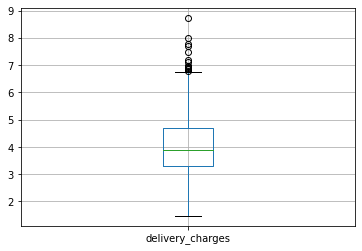

In [77]:
#Using boxplot of matplot in line command  to plot box plot
%matplotlib inline
box= out_df.boxplot(column='delivery_charges')

According to the boxplot, it seems that there are many outliers on the upper bound of the boxplot. When we find where the outlier is in the boxplot, now we 
will calculate the quantile and inter-quantile range of the interested variable by using the `.quantile()`  function to get quantile 1 to quantile 3.

In [78]:
#Find all the quantiles for outlier calculation
out_df['delivery_charges'].quantile([0.25,0.5,0.75])

0.25    3.292100
0.50    3.883850
0.75    4.683075
Name: delivery_charges, dtype: float64

After we get all the quantiles, we will calculate the inter-quantile range by substract quantile-3 three with quantile-1. Then we will use the inter-quantile range to calculate the upper/lower bound of the `delivery charge` boxplot. The equation for calculate upper boundary is `1.5+ quantile 3th * interquantile`, while the lower boundary equation is `1.5- the first quantile * interquantile range`. If the number is more than upper quantile or less than lower quantile, they are considered as outliers.

In [79]:
#Finding the Inter-quantile range for finding the maximum and minimum threshold of data
Q1 = 3.292100
Q3 = 4.683075
IR = Q3-Q1 #inter-quantile range
IR

1.3909749999999996

In [80]:
# Identify the maximum and minimum threshold/ upper or lower bound of data
#maximum threshold (Q3 + 1.5 * IR)
upper = Q3 + 1.5 * IR
print(upper)

#minimum threshold (Q1-1.5*IR)
lower = Q1 - 1.5 * IR
print(lower)

6.769537499999999
1.2056375000000004


Once the lower/upper bound of boxplot are identified, it will be used for filtering the outlier dataset to identified which row got an outler.

In [81]:
#Identify how many outlier are there in delivery charge column.
print(len(out_df[(out_df['delivery_charges']>upper) | (out_df['delivery_charges']<lower)]))
out_df[(out_df['delivery_charges']>upper) | (out_df['delivery_charges']<lower)]

14


,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating
47,ORD173380,REST1420,CUST04715,COUR0183,-37.815726,144.921857,2020-09-27,20:18:27,0,1,Car,"[('roast beef', 2), ('masala dosa', 2), ('chic...",0,81.950,4080,10,6.98160,9.26
141,ORD035529,REST2023,CUST00171,COUR0802,-37.798505,145.007094,2020-05-08,05:52:05,0,0,Bike,"[('appam', 1), ('vegetable stew', 3), ('duck r...",0,134.170,8309,42,6.94790,8.39
157,ORD129021,REST0774,CUST02835,COUR2260,-37.818928,144.998659,2020-08-06,19:03:17,1,0,Bike,"[('pasta', 3), ('cocktails', 1), ('sunday brun...",40,60.786,3294,16,8.71830,9.51
159,ORD226667,REST2023,CUST03087,COUR0968,-37.818733,145.015963,2020-02-21,14:06:35,0,0,Bike,"[('appam', 2), ('vegetable stew', 3)]",0,57.890,7858,39,6.85230,8.39
194,ORD140870,REST0978,CUST04448,COUR2851,-37.820408,144.927867,2020-03-09,18:27:41,1,0,Bike,"[('butter naan', 1), ('sweet corn soup', 3), (...",0,81.520,6059,30,7.10900,9.02
201,ORD348342,REST1829,CUST10643,COUR2546,-37.798734,145.000224,2020-05-17,19:15:09,1,1,Motorbike,"[('manchurian', 1), ('noodles', 2)]",0,31.400,7502,15,6.79860,8.05
227,ORD243231,REST0978,CUST07538,COUR2738,-37.814186,144.944555,2020-05-23,01:19:07,0,1,Motorbike,"[('kulfi', 2), ('butter naan', 2)]",0,82.160,3239,6,6.90750,9.02
244,ORD122375,REST1829,CUST00131,COUR1430,-37.800397,144.972615,2020-01-12,12:47:28,1,1,Bike,"[('manchurian', 2), ('chowmein', 1), ('momos',...",0,102.540,4844,24,7.78890,8.05
256,ORD172176,REST1829,CUST01521,COUR0128,-37.799366,144.960031,2020-06-17,12:07:54,1,0,Motorbike,"[('manchurian', 3), ('sweet corn soup', 3), ('...",40,100.008,3929,8,7.47960,8.05
302,ORD274039,REST2023,CUST03042,COUR3147,-37.798926,144.970320,2020-03-23,12:19:46,1,0,Car,"[('vegetable stew', 1), ('roast chicken', 2), ...",40,42.090,3493,8,6.87225,8.39


In [82]:
#drop the row which got outlier and assign it as new dataframe for the method comparison in the last part
out_box=out_df.drop(out_df[out_df['delivery_charges']>upper].index)
out_box[out_box['delivery_charges']>upper]

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating


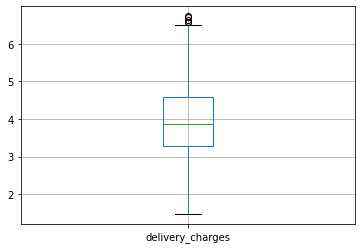

In [83]:
#plot out_box into boxplot after remove outlier
%matplotlib inline
box= out_box.boxplot(column='delivery_charges')

After identifying how many outliers are there, we got 14 outliers when using boxplot, and we remove it. Then we assign a new dataframe which consist of dataset which remove outlier with boxplot method name `out_box`for comparing at the last section. However, there is still some outlier in there, this is because delivery charge is a multivariate outlier, so we will try another method to see the differences.

#### 5.2.2 Using the box-plot for residual of linear regression model for outlier detection

Another approach for detect outlier which can be done by fit the dataset into regression model and identify the error between observe value and predicted value (residuals) (Pan,2021). For the first step of this approach, the predictors (travel_time,is_peak_time,is_weekend, and restaurant rating will be used as the predictors for delivery charges. After fit in the model, the observed value of the delivery charge will be subtracted by the predicted value for identify each prediction residuals.

In [84]:
#Fit the dataset inside the linear regression model
lm_out = LinearRegression()
lm_out.fit(out_df.loc[:,['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']],out_df.loc[:,['delivery_charges']])
lm_pred=lm_out.predict(out_df.loc[:,['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']])

In [85]:
#Create residual column for outlier dataset
out_df['residual'] = (out_df.loc[:,['delivery_charges']] - lm_pred)

After the residuals are identified, it will be used for making a boxplot to identify whether which residual is considered as an outlier. The residual which higher than the upper boundary and lower boundary will be considered as outliers.

<AxesSubplot:>

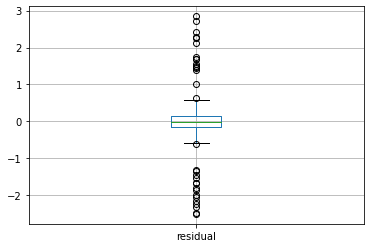

In [86]:
#Assign the full dataset as lm_outbox use for this section and comparison in the next section
lm_outbox= out_df
%matplotlib inline
lm_outbox.boxplot(column='residual')

Based on the boxplot of residuals, it seems that there are many residuals whch considered as an outlier because it is over the upper boundary and under boundary. The next process is similar to the boxplot section, which the first quantile, third quantile, and inter-quantile range are calculated for identify the upper/lower boundary. The quantile can be calculate by using `.quantile([0.25,0.5,0.75])` (Beny,2017) to calculate by 25,50,75 percentile 

In [87]:
#Find all the quantiles for outlier calculation
lm_outbox['residual'].quantile([0.25,0.5,0.75])

0.25   -0.145289
0.50   -0.004503
0.75    0.158604
Name: residual, dtype: float64

In [88]:
#Finding the Inter-quantile range for finding the maximum and minimum threshold of data
Q1 = -0.145289
Q3 = 0.158604
IR = Q3-Q1 #inter-quantile range

Once we identify the boundaries value, we will used them for identify how many rows got an outlier based on residual

In [89]:
#Find all the number of outlier and show all the rows which got outlier
print(len(lm_outbox[(lm_outbox["residual"]>Q3 + 1.5 * IR) | (lm_outbox["residual"]<Q1 - 1.5 * IR)]))
lm_outbox[(lm_outbox["residual"]>Q3 + 1.5 * IR) | (lm_outbox["residual"]<Q1 - 1.5 * IR)]

32


,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating,residual
17,ORD142777,REST1829,CUST00416,COUR4762,-37.815502,144.977353,2020-03-19,06:03:57,0,0,Motorbike,"[('chowmein', 3), ('momos', 2), ('egg fried ri...",0,124.200,4023,8,1.66495,8.05,-1.857371
19,ORD270244,REST1420,CUST11409,COUR2152,-37.811632,144.971579,2020-03-26,01:23:04,0,0,Car,"[('chicken curry', 3), ('fish fry', 1), ('beef...",40,46.686,2600,6,4.69755,9.26,1.486904
47,ORD173380,REST1420,CUST04715,COUR0183,-37.815726,144.921857,2020-09-27,20:18:27,0,1,Car,"[('roast beef', 2), ('masala dosa', 2), ('chic...",0,81.950,4080,10,6.98160,9.26,2.425548
55,ORD301732,REST1420,CUST05418,COUR0613,-37.818589,144.968064,2020-06-02,20:14:30,0,0,Motorbike,"[('masala dosa', 2), ('fish fry', 3)]",0,94.120,2852,6,3.85090,9.26,0.640254
58,ORD128416,REST1420,CUST03632,COUR3551,-37.798932,144.944273,2020-10-05,23:44:10,0,0,Bike,"[('fish fry', 1), ('beef fry', 1)]",0,40.210,1049,5,4.49415,9.26,1.382354
60,ORD012872,REST0774,CUST00901,COUR1877,-37.826798,144.982218,2020-02-02,23:28:21,0,1,Car,"[('pasta', 1), ('shotgun chicken', 3), ('sunda...",10,104.913,2058,5,5.51460,9.51,1.476347
94,ORD097527,REST1420,CUST03603,COUR4654,-37.824991,144.949411,2020-10-15,01:07:15,0,0,Car,"[('masala dosa', 1), ('chicken biryani', 2)]",10,39.825,3110,7,1.65270,9.26,-1.656796
120,ORD341140,REST2023,CUST05426,COUR2196,-37.812502,144.963241,2020-08-28,19:38:54,1,0,Bike,"[('appam', 1), ('duck roast', 3)]",40,24.090,1977,10,4.75850,8.39,-0.624616
148,ORD189101,REST1420,CUST04566,COUR1730,-37.813995,144.949241,2020-09-28,11:00:39,0,0,Car,"[('roast beef', 3), ('beef fry', 1), ('chicken...",0,74.790,2211,5,4.56780,9.26,1.456004
157,ORD129021,REST0774,CUST02835,COUR2260,-37.818928,144.998659,2020-08-06,19:03:17,1,0,Bike,"[('pasta', 3), ('cocktails', 1), ('sunday brun...",40,60.786,3294,16,8.71830,9.51,2.847581


In [90]:
#Remove outlier based on boxplot
lm_outbox = lm_outbox.drop(lm_outbox[(lm_outbox["residual"]>Q3 + 1.5 * IR) | (lm_outbox["residual"]<Q1 - 1.5 * IR)].index)
lm_outbox.shape

(468, 19)

After identify all the rows consist of outlier (32 rows), we will assign the dataset as `lm_outbox` and remove the row which consist of the outlier by using `.drop` on it.

<AxesSubplot:>

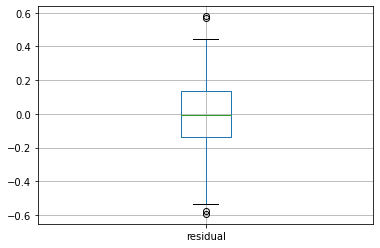

In [91]:
#boxplot after remove outlier
%matplotlib inline
lm_outbox.boxplot(column='residual')

Regarding to all the process, there are several outliers left inside the dataset after the majority of them are removed. However, it is still not clear which method can be used  for detect and remove the outliers in this dataset. As a result, the comparison between these two methods will be required by fitting the first dataset which used only box_plot (`out_box`) and the second dataset which using residual value and boxplot to detect outlier (`lm_outbox`) which already remove the outlier into regression model and compare the R-square in the next section.

### 5.3 Using linear model to compare the dataset which remove outlier with different outlier detection method

In this section, the linear regression will be used to check the prediction accuracy after the outlier is removed by the two outlier detection methods (box-plot only, and residual of linear regression boxplot). The first step of this part will start with split the files and fit them into regression model. Then, we will identify the r-square of each dataframe

In [92]:
#Train_tests_split for out_box dataframe (dataframe which using boxplot to remove outlier)
X_train,X_test,y_train,y_test=train_test_split(out_box.loc[:,['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']],
                                               out_box.loc[:,['delivery_charges']],test_size=0.20,random_state=111)

In [93]:
#Rsquare of out_box
lm = LinearRegression()
lm.fit(X_train,y_train)
print("R-square:",lm.score(X_test,y_test))

R-square: 0.7740035031898952


In [94]:
#train_tests_split lm_outbox
X_train,X_test,y_train,y_test=train_test_split(lm_outbox.loc[:,['travel_time_minutes','is_peak_time','is_weekend','restaurant_rating']],
                                               lm_outbox.loc[:,['delivery_charges']],test_size=0.20,random_state=111)

In [95]:
#R square lm_outbox
lm = LinearRegression()
lm.fit(X_train,y_train)
print("R-square:",lm.score(X_test,y_test))

R-square: 0.9586614405986896


Based on the r-square result, it seems that the combination of residuals and boxplot is suitable for handling with multivariate outlier in this dataset. Therefore, the 'lm_outbox' dataset will be a replacement of the outlier-dataset.

In [96]:
# shape of the dataset after remove outlier
lm_outbox.shape

(468, 19)

In [97]:
# replace the original outlier dataset with the chosen remove outlier dataset
out_df = lm_outbox

## 6. Remove all the unnecessary columns and adjust the dataframe and export the file

In the last section, all the dataset will be checked and remove all the unnecessary columns in the dataframe before export into a solution csv file.
The following approach are done in each dataset:
1. The node and rest_node column in dirty_dataset will be remove,and the shortest_distance and travel_time column data type will be changed to integer.
2. The node and rest_node column will be remove from missing_dataset, and the travel time minute column data type will be change to integer.
3. Residual column will be remove form outlier dataset, and the restaurant_rating will be on the 17th position and delivery charge will be on 18th position.
Then, all the dataframe will be exported as a solution.csv file


In [98]:
#explore the dirty_dataset 
dirty_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD000577,REST0774,CUST05532,COUR0839,-37.820753,144.966833,2020-09-23,17:12:31,0,0,Car,"[(red wine sangria, 2), (shotgun chicken, 2), ...",40,56.73,529.0,1.0,9.51,2.8026,617564712,4824077319
1,ORD001005,REST1829,CUST04615,COUR2687,-37.812684,144.947336,2020-09-06,19:54:43,1,1,Motorbike,"[(momos, 2), (noodles, 1)]",10,166.13,829.0,1.0,8.05,5.4576,579986297,628171589
2,ORD001585,REST0978,CUST07113,COUR0945,-37.824264,145.014430,2020-12-10,19:58:40,1,0,Bike,"[(butter naan, 3), (steak, 3)]",10,122.40,5827.0,29.0,9.02,7.0563,781082259,331164104
3,ORD003314,REST1420,CUST12151,COUR3943,-37.803468,144.962735,2020-01-18,11:32:18,0,1,Car,"[(roast beef, 2), (chicken biryani, 3), (chick...",0,119.73,1472.0,3.0,9.26,4.3907,4400674670,4735909080
4,ORD003663,REST2023,CUST03643,COUR0952,-37.802989,144.967552,2020-10-03,10:29:00,0,1,Motorbike,"[(appam, 3), (duck roast, 1), (vegetable stew,...",10,53.41,2982.0,5.0,8.39,4.4579,471341105,636708808


In [99]:
#change all the dataformat of some column and drop unnecessary column
dirty_df=dirty_df.astype({"shortest_distance_to_customer":int,"travel_time_minutes":int})
dirty_df=dirty_df.drop(['node','rest_nodes'],axis=1)

In [100]:
#explore missing file
miss_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,restaurant_rating,delivery_charges,node,rest_nodes
0,ORD192636,REST0978,CUST08006,COUR2992,-37.819614,145.009910,2020-08-10,06:19:46,0,0,Car,"[(sweet corn soup, 1), (chicken tikka, 3)]",10,68.08,4971.0,12,9.02,4.029300,1458418093,331164104
1,ORD272738,REST0774,CUST07704,COUR4925,-37.799622,144.955018,2020-05-02,18:19:46,1,1,Bike,"[(cocktails, 2), (beer, 2), (new zealand lamb ...",0,86.66,2610.0,13,9.51,6.032200,1281079287,4824077319
2,ORD227107,REST1420,CUST01854,COUR1894,-37.824904,145.008606,2020-03-29,00:11:52,0,1,Car,"[(chicken biryani, 1), (beef fry, 1), (roast b...",0,74.79,6640.0,16,9.26,5.164572,260907254,4735909080
3,ORD335629,REST1420,CUST10362,COUR4578,-37.824876,144.991662,2020-12-21,16:21:05,0,0,Motorbike,"[(chicken biryani, 3), (beef fry, 2)]",0,80.78,4977.0,10,9.26,3.916600,2935371904,4735909080
4,ORD046630,REST1829,CUST00975,COUR2439,-37.811356,144.964172,2020-09-19,06:03:57,0,1,Motorbike,"[(sweet corn soup, 2), (egg fried rice, 2), (m...",0,117.48,3511.0,7,8.05,4.588600,176704317,628171589


In [101]:
#Change column data type and drop some columns
miss_df=miss_df.astype({"travel_time_minutes":int})
miss_df=miss_df.drop(['node','rest_nodes'],axis=1)

In [102]:
#Explore outlier file
out_df.head()

,order_id,restaurant_id,customer_id,carrier_id,customer_lat,customer_lon,date,time,is_peak_time,is_weekend,carrier_vehicle,shopping_cart,coupon_discount,order_price,shortest_distance_to_customer,travel_time_minutes,delivery_charges,restaurant_rating,residual
0,ORD163878,REST0774,CUST07128,COUR3727,-37.802293,144.942400,2020-08-06,01:54:43,0,0,Bike,"[('red wine sangria', 1), ('sunday brunch', 3)...",10,107.235,3158,16,3.9388,9.51,-0.236799
1,ORD270434,REST1420,CUST10210,COUR2071,-37.814726,144.945800,2020-10-25,13:19:07,1,1,Motorbike,"[('masala dosa', 3), ('roast beef', 3)]",0,99.390,1847,4,5.3648,9.26,-0.293272
2,ORD178283,REST2023,CUST04426,COUR0047,-37.824984,144.944520,2020-02-12,07:03:17,0,0,Car,"[('appam', 2), ('duck roast', 2), ('vegetable ...",0,138.470,1142,3,3.1242,8.39,0.128155
3,ORD155302,REST1420,CUST12843,COUR1056,-37.799737,144.934823,2020-06-17,20:06:35,0,0,Car,"[('beef curry', 3), ('chicken curry', 2), ('ch...",0,72.830,5284,13,4.1702,9.26,0.267603
4,ORD071828,REST0774,CUST05493,COUR3809,-37.816068,144.963311,2020-01-24,02:02:38,0,0,Motorbike,"[('pasta', 1), ('new zealand lamb chops', 2), ...",40,54.498,646,1,2.7926,9.51,0.099753


In [103]:
#Remove all the unnecessary columns and reorder columns
out_df=out_df.drop(['residual'],axis=1)
out_df=out_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,16]]

In [104]:
#Create output file
dirty_df.to_csv("32338589_dirty_solution.csv",index=False)
miss_df.to_csv("32338589_missing_solution.csv",index=False)
out_df.to_csv("32338589_outlier_solution.csv",index=False)

## Summary

Based on all the process for completing these following tasks and the result, these are what is found and fixed for each dataset:
1. Dirty dataset: 
In this dataset, there are two types of anomalies found in the following columns:
- Carrier_vehicle: An error in spelling or capitalise of the word. As a result, it syntatic anomalies in this column. This problem is fix by making the spelling correct
- Customer_lat and Customer_lon: The anomalies is cause by the incorrect column swapped value (syntatic anomalies), which can be fix by swap the wrong column pairs.
- date: This column got an error in the date format such as year-month-day and year-month(alphabet)-day which are syntatic anomalies. This column can be fixed by change all the column format to the correct one.
- Is_peak_time and Is_weekend : These are the first two columns which got a semantic anomalies. They got the correct information type;however, it appears that some information did not match with the date and time column. For example, Is_peak_time equal to one when the time is not 12-13:59:59 or 18-19:59, and Is_weekend is assigned as "1" during weekday. These problems can be fixed by replace the wrong information with the right one by detect the date and time and change these two table accroding to the time and date column.
- Travel_time_minutes: There are some wrong calculation travelling time. These columns can be fixed by using the true speed of each vehicle type to calculate with the distance.
- Coupon_discount and Order_price: These two column are the most difficult column to deal, because the anomalies which occur between each row for these column can be either treat as syntatic or semantic. Despite the earlier mentioned fact, it can be fixed by either change the order_price column based on the true price calculation based on the price product or change the amount of coupon discount. As a result to make efficient result, the replacement of true price with order_price is done.
2. Missing_dataset:
In this dataset, these are the processes for imputing the missing value in the following columns:
- Shortest_distance column: The missing column will be impute by using the shortest distance calculation algorithm using in the dirty dataset. This algorithm is based on the nodes between restaurant and the customer destination.
- Rating: The rating is caluculated by using sentiment intensity analyzer on the restaurant_data dataset's reviews_list column and calculate each restaurant polarity compund score and apply it into the rating calculation formula.
- Delivery_charge: The missing column is replaced by the prediction calculating from linear regression model on the non-null value. For the model, the independent variables are travelling_time,is_peak_time,is_weekend, and restaurant_rating, and dependent variable are delivery charges.
3.Outlier_dataset:
In this dataset, these two outlier detection methods are used on the outlier dataset as the following:
- Box-plot on the delivery charge only:After remove the outlier got an r-square of 0.78 when fit in the linear regression model.
- Box-plot of linear regression model residual: This method detect the most outlier, and after the outliers are removed; the dataset got 0.95 r-square when fit in the regression model.
Therefore, the box-plot of linear regression model residual outlier is the most suitable outlier detection method for outlier_dataset.

## References

- Ayhan. (2017, April 1). <i>How to create an array from two columns in pandas</i>. https://stackoverflow.com/questions/43160575/how-to-create-an-array-from-two-columns-in-pandas
- Beny. (2017,August 28). <i>How to calculate 1st and 3rd quartiles?</i>. https://stackoverflow.com/questions/45926230/how-to-calculate-1st-and-3rd-quartiles/45926291
- Bharath. (2017, December 31). <i>What is correct syntax to swap column values for selected rows in a pandas data frame using just one line </i>. https://stackoverflow.com/questions/25792619/what-is-correct-syntax-to-swap-column-values-for-selected-rows-in-a-pandas-data-
- Dolon. B. (2020, July 19). <i>How to Quickly Create and Unpack Lists with Pandas</i>. https://towardsdatascience.com/how-to-quickly-create-and-unpack-lists-with-pandas-d0e78e487c75
- Hilsdolf M. (2020, September 7). <i>Dealing with List Values in Pandas Dataframes</i>. https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
- Jezrael. (2017, June 29). <i>why does pd.to_datetime fail to convert?</i>.https://stackoverflow.com/questions/44823001/why-does-pd-to-datetime-fail-to-convert
- MaxU. (2017, August 23). <i>How to delete all columns in DataFrame except certain ones?</i>. https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
- Muhamed. G.(2018, July 2). <i>Pandas group-by and sum</i>.https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
- Narasimhan. R. (2018, June 16). <i>Networkx: Calculating and storing shortest paths on a graph to a Pandas Data frame</i> .https://stackoverflow.com/questions/50884035/networkx-calculating-and-storing-shortest-paths-on-a-graph-to-a-pandas-data-frame
- <i>networkx.convert_matrix.from_pandas_edgelist</i>.(n.d.). https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
- <i>numpy.linalg.lstsq</i>. (n.d.). https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
- Pan. S. (2021). <i>FIT 5196 week 8[video_file]</i>. https://monash.au.panopto.com/Panopto/Pages/Viewer.aspx?id=5821a0a1-8331-4fc9-8d00-ada3006bf180
- <i>pandas.crosstab</i>.(n.d.). https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- <i>pandas.DataFrame.iloc</i>. (n.d.) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
- <i>pandas.DataFrame.loc</i>. (n.d.). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
- <i>pandas.DataFrame.rename</i>(n.d.).https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
- <i>pandas.pivot_table</i>/ (n.d.).https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
- <i>pandas.Series.round</i>. (n.d.). https://pandas.pydata.org/docs/reference/api/pandas.Series.round.html
- <i>pandas.to_datetime</i>(n.d.).https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
- Root. (2016, October 6). <i> Efficiently replace values from a column to another column Pandas DataFrame</i>. 
    https://stackoverflow.com/questions/39903090/efficiently-replace-values-from-a-column-to-another-column-pandas-dataframe
- Specter07. (2020, May 5). <i> Output vader sentiment scores in columns based on dataframe rows of tweets </i>. 
    https://stackoverflow.com/questions/61608057/output-vader-sentiment-scores-in-columns-based-on-dataframe-rows-of-tweets
